In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import re
print(pd.__version__)
print(np.__version__)

0.23.4
1.15.4


In [2]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
petitions = pd.read_csv('petition.csv',
                        parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 본다.
petitions.shape

(377756, 8)

In [3]:
petitions.describe()

,article_id,answered,votes
count,377756.000000,377756.000000,3.777560e+05
mean,239703.455924,0.000077,1.514069e+02
std,146382.863480,0.008761,4.842551e+03
min,21.000000,0.000000,0.000000e+00
25%,108933.750000,0.000000,1.000000e+00
50%,237637.000000,0.000000,5.000000e+00
75%,367937.250000,0.000000,1.500000e+01
max,492043.000000,1.000000,1.192049e+06


In [4]:
df=petitions
df.describe()

,article_id,answered,votes
count,377756.000000,377756.000000,3.777560e+05
mean,239703.455924,0.000077,1.514069e+02
std,146382.863480,0.008761,4.842551e+03
min,21.000000,0.000000,0.000000e+00
25%,108933.750000,0.000000,1.000000e+00
50%,237637.000000,0.000000,5.000000e+00
75%,367937.250000,0.000000,1.500000e+01
max,492043.000000,1.000000,1.192049e+06


In [5]:
df.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [6]:
df.shape

(377756, 8)

In [7]:
start_df = pd.DataFrame(petitions['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()
#start_df.tail()

청원 집계: 509일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


In [8]:
df.loc[df["start"]=='2017-11-11'].sort_values('votes', ascending=False)

,article_id,start,end,answered,votes,category,title,content
39124,40497,2017-11-11,2017-12-11,0,58470,보건복지,"[도와주세요] ""간호사, 의료인인가요? 하인인가요? "" <전국 간호사 처우개선 청원>",[전국 간호사/간호학생 처우 개선 청원글]\n의료법 제 1장 제2조(의료인) ①이 ...
34661,35990,2017-11-11,2017-12-11,0,15519,인권/성평등,"경찰을 대상으로 한 가정폭력, 성폭력 인식 재교육과 부적절한 대응의 처벌강화를 청원...","2017년 11월 2일 목요일, 한 '가정폭력 쉼터'에 가정폭력 가해자가 침입을 시..."
30254,31573,2017-11-11,2017-12-11,0,1863,외교/통일/국방,안보를 위해 여성도 병역의 의무를 이행해야 합니다.(3차 청원),1차 청원(2017년 8월 30일 ~ 9월 14일) : 12만 3204명\n2차 청...
30747,32068,2017-11-11,2017-12-11,0,1364,문화/예술/체육/언론,우리의 조상 단군할아버지를 고물상에 버린 학교장을 처벌해 주시기 바랍니다.,존경하고 사랑하는 대통령님! 청와대 관계자님! 저는 홍익문화운동연합 회장 정성률입니...
30501,31820,2017-11-11,2017-12-11,0,843,교통/건축/국토,"과적을 요구 하지 않으면 과적은 없습니다. 알선소,화주,업체 대기업 마저 4.5톤차...",화물차 기사님들도 과적을 원치 않습니다.\n과적을 하게 되면 차 수리비나 소모품이 ...
30186,31503,2017-11-11,2017-12-11,0,550,인권/성평등,성폭행 무고죄 처벌 강화해주세요,성폭행 무고죄로 인정되는 사건에 한해서 처벌 강화해주세요\n성폭행 무고죄가 점점 증...
30270,31589,2017-11-11,2017-12-11,0,141,정치개혁,이명박 출국금지 해주세요,이명박 출국금지 해주세요
39459,40833,2017-11-11,2017-12-11,0,104,교통/건축/국토,의혹 투성이 대연비치 재건축 과정 수사 청원합니다!,이해가 되지 않는 고분양가 재건축 시공비와 잘못된 설계로 인한 대형 평수 미분양 ...
30135,31451,2017-11-11,2017-12-11,0,93,정치개혁,이명박 전 대통령의 출국 금지,이명박 전 대통령의 출국을 금지하여 하루 속히 구속수사하여 주세요
37751,39100,2017-11-11,2017-12-11,0,69,기타,"일간베스트, 메갈리아 등 유해 사이트 폐쇄 해 주세요.","일간베스트, 메갈리아는 사회 갈등을 조장하는 사이트인데 폐쇄 해 주시면 감사하겠습니..."


In [9]:
df.loc[df["start"]=='2017-11-11']

,article_id,start,end,answered,votes,category,title,content
30073,31383,2017-11-11,2017-12-11,0,1,정치개혁,이명박 출국금지,이명박 출국금지\n조속한 구속수사
30074,31384,2017-11-11,2017-12-11,0,3,인권/성평등,조두순 출소 금지,조두순의 출소금지 특별법 제정을 촉구 합니다.
30075,31386,2017-11-11,2017-12-11,0,39,정치개혁,이명박 출국금지,정의가 바로 선 나라를 만들기 위해 꼭...!
30076,31387,2017-11-11,2017-12-11,0,2,정치개혁,이명박출국금지시켜라,명박이을출국금지시키고 수사하라
30077,31388,2017-11-11,2017-12-11,0,1,정치개혁,이명박출국금지시켜라,명박이을출국금지시키고 수사하라
30078,31389,2017-11-11,2017-12-11,0,6,정치개혁,이명박 출국금지,MB 수사 급물살 탄다는데 12일 출국한답니다..\n왜! ?why??\n이 시점에...
30079,31390,2017-11-11,2017-12-11,0,3,정치개혁,이명박 출국금지,이명박 출국금지
30080,31391,2017-11-11,2017-12-11,0,0,정치개혁,반대,반대합니다
30081,31392,2017-11-11,2017-12-11,0,3,정치개혁,이명박 출국 금지를 탄원합니다,철저한 수사를 촉구하며 죗값을 치르고 추방되길 진심 바랍니다
30082,31393,2017-11-11,2017-12-11,0,0,기타,이명박 출국금지,출국장 문을 다씁니다.


In [10]:
df.loc[df["start"]=='2017-09-05'].reset_index()

,index,article_id,start,end,answered,votes,category,title,content
0,3433,3474,2017-09-05,2017-12-04,0,0,안전/환경,소년법 폐지 죄질은 나이가 없다,소년법 폐지 무서워서 애들을 키울수가 없어요
1,3434,3475,2017-09-05,2017-12-04,0,0,인권/성평등,소년법폐지 제발 부탁드립니다,대통령님..부산여중생폭행사건 보셨는지요\n정말 아이를 키우고있는 부모로써 너무나 마...
2,3435,3476,2017-09-05,2017-12-04,0,0,인권/성평등,청소년 보호법 폐지,청소년 보호법 폐지
3,3436,3477,2017-09-05,2017-09-12,0,0,기타,청소년법 폐지해주세요,폐지해주세요 아이낳고 키우는게 이나라에선 너무 무섭습니다.
4,3437,3478,2017-09-05,2017-09-12,0,0,기타,청소년법 폐지해주세요,폐지해주세요 아이낳고 키우는게 이나라에선 너무 무섭습니다.
5,3438,3479,2017-09-05,2017-09-12,0,0,기타,청소년법 폐지해주세요,폐지해주세요 아이낳고 키우는게 이나라에선 너무 무섭습니다.
6,3439,3480,2017-09-05,2017-09-12,0,0,기타,청소년법 폐지해주세요,폐지해주세요 아이낳고 키우는게 이나라에선 너무 무섭습니다.
7,3440,3481,2017-09-05,2017-09-12,0,0,기타,청소년법 폐지해주세요,폐지해주세요 아이낳고 키우는게 이나라에선 너무 무섭습니다.
8,3441,3482,2017-09-05,2017-09-12,0,0,기타,청소년법 폐지해주세요,폐지해주세요 아이낳고 키우는게 이나라에선 너무 무섭습니다.
9,3442,3483,2017-09-05,2017-09-12,0,0,기타,청소년법 폐지해주세요,폐지해주세요 아이낳고 키우는게 이나라에선 너무 무섭습니다.


In [11]:
df.loc[df["start"]=='2018-01-11'].reset_index()

,index,article_id,start,end,answered,votes,category,title,content
0,76556,83445,2018-01-11,2018-02-10,0,4,정치개혁,국회의원 연임제한을 개헌안에 반영해주세요,현 헌법에서는 장기집권의 폐해를 방지하기 위해\n대통령 5년단임제를 체택하고...
1,76557,83446,2018-01-11,2018-02-10,0,5,경제민주화,가상화폐 - 규제와 탄압이 아닌 다른 방안을 생각해주세요.,안녕하세요. 대통령님 또 모든 공직자여러분\n저는 33살 지극히도 평범(평범이하일지...
2,76558,83447,2018-01-11,2018-02-10,0,12,경제민주화,"암호화폐 규제, 남잘 되는 꼴 못보는 전형적인 열등한 좌파의 심리....써브프라임 ...",암호 화폐를 규제하는데 강력히 반대는 한다.\n2007년 써브프라임 모기지로 인한 ...
3,76559,83448,2018-01-11,2018-02-10,0,0,일자리,비정규직전환.근무시간단축.최저임금,우선 글에 두서없음을 양해부탁드립니다\n저는 39세로 흔히말하는 고객센터 감성노동자...
4,76560,83449,2018-01-11,2018-02-10,0,6,일자리,가상화폐투기 이제는 금지할때,투기 도박으로부터 나라른 지키자
5,76561,83450,2018-01-11,2018-02-10,0,43,성장동력,중국 가상화폐 거래소 폐쇄에 따른 결과를 우리도 답습해야합니까,중국은 가상화폐 거래소를 폐쇄하였고 그 결과\n암시장에서 개인과 개인간 사행성 거래...
6,76562,83451,2018-01-11,2018-02-10,0,19,기타,비트코인 거래소 폐지 찬성합니다,20~30대 청년들이 비트코인이란 도박에 빠져있습니다.\n블록체인 기술 4차 IT혁...
7,76563,83452,2018-01-11,2018-02-10,0,6,문화/예술/체육/언론,인터넷 실명제 추진 필요합니다.,"스마트폰이 보급되면서 언제 어디서나 인터넷을 사용할수 있게되었습니다.\nSNS, 인..."
8,76564,83453,2018-01-11,2018-02-10,0,17,일자리,가상화폐 (비트코인) 금지 관련 조항 철회 요구,현재 세간을 흔들고 있는 가상화폐 금지와 철폐관련 소식에 따라 이런 글을 작성합니다...
9,76565,83454,2018-01-11,2018-02-10,0,45,경제민주화,"금감원, 법무부의 무책임한 코인 거래소 규제에 경고합니다.",현행법상 코인거래소 운영이나 코인거래소에서 코인 거래를 하는 사람들이 불법입니까?\...


In [12]:
df.loc[df["start"]=='2018-02-06'].reset_index()

,index,article_id,start,end,answered,votes,category,title,content
0,107199,128565,2018-02-06,2018-03-08,0,3,정치개혁,부산 여중생 사건 보고 생각이 났습니다,안녕하세요?부산에 살고있는 한학생 입니다 근데 저가 SNS를 보고 있다가 부산 여중...
1,107200,128566,2018-02-06,2018-03-08,0,3,외교/통일/국방,독도문제에 대하여 강력한 항의를 요구 합니다.,평창올림픽에 대표팀 국가마크를 독도를 표기했다는 이유로 항의한 일본 정부에 대하여 ...
2,107201,128567,2018-02-06,2018-03-08,0,19,기타,양승태 대법원장 체재를 그대로 유지해서 오늘 희대의 지록위마 판결을 자초한 김명수 ...,"지난번 신광렬 판사의 구속적부심 판결에 대해 재판독립 운운하시며 쉴드치시고,\n아직..."
3,107202,128568,2018-02-06,2018-03-08,0,4,정치개혁,평창올림픽 북한 만경봉호 입항허가는 대한민국과 국민에 대한 치욕이며 그 입항거부를 ...,대한민국 정부의 북한 천안함 폭침에 대한 제재인 북한선박 입항 금지는 지켜져야 합니...
4,107203,128572,2018-02-06,2018-03-08,0,95,경제민주화,삼성이재용의 판결? <국민이 아직도 우습나요? >,이재용이 웃었습니다.석방되었다고 죄가 없다는게 아니란걸 모르지는 않았을텐데 말입니다...
5,107204,128573,2018-02-06,2018-03-08,0,3,외교/통일/국방,문재인에 대한의혹,1.2 민정수석실 협박 논란\n1.3 삼성 특검 수사 제지 논란\n1.4 아들 고용...
6,107205,128574,2018-02-06,2018-03-08,0,19,기타,대한민국은 삼성민국입니까??? 직접 대통령께 듣고 싶습니다!!!,길게 말 하고 싶지도 않습니다.\n아무리 돈을 먹고 먹고 계속 먹어도\n아무리 죄를...
7,107206,128576,2018-02-06,2018-03-08,0,12,육아/교육,유해한 사이트 텀블러 사이트를 국내에서 재제조치를 할 수 있도록 도와주세여,요즘 아이들에게 스마트폰 만큼 유해한 앱사이트가 많이 늘어나고 있습니다.\n그 중 ...
8,107207,128578,2018-02-06,2018-03-08,0,4,문화/예술/체육/언론,내로남불,지금 정부는 겉다르고 속다른 행동을 하고 있습니다\n사람이 먼저다 하고 탄져백신은...
9,107208,128580,2018-02-06,2018-03-08,0,19,인권/성평등,성폭행 사건 소멸시효 없애주세요.,다음 내용은 오마이뉴스 기사를 부분 발췌한 것입니다.\n'성폭행 사건은 소멸시효가 ...


In [13]:
from collections import Counter
from konlpy.tag import Twitter

nlpy = Twitter()

C:\Users\hyunho\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [14]:
from PIL import Image

In [19]:
from wordcloud import WordCloud
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
fontpath = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무','현재','또한','다시','지금'
               ,'이렇게','물론','그런','아닌','000원','000명','000만원'
               ,'있습니다','있는','것입니다'] 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'black', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                        mask=mask_img,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

C:\Users\hyunho\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


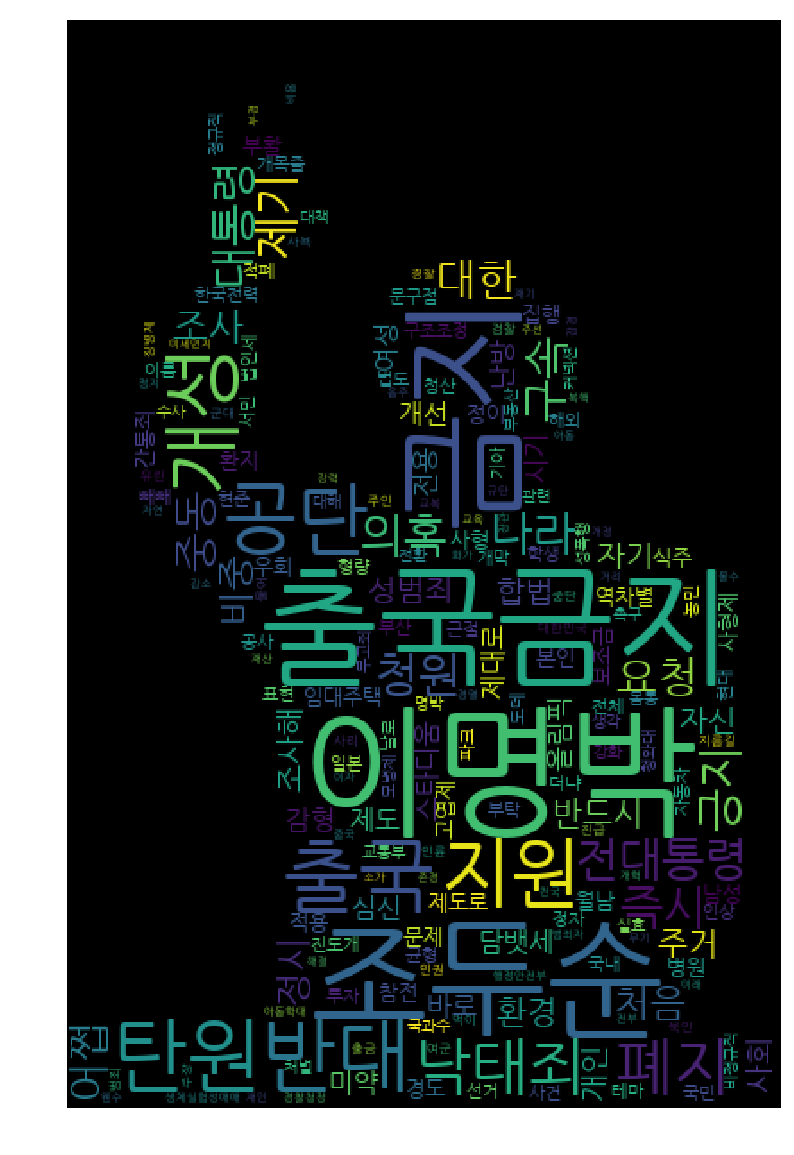

Wall time: 2.55 s


In [20]:
df_2017_11_11=DataFrame()
df_2017_11_11=df.loc[df["start"]=='2017-11-11'][0:200].reset_index()
df_2017_11_11["10word"]=0
for index in df_2017_11_11.index[0:201]:
    nouns=0
    count=0
    lines=df_2017_11_11["title"][index]
    nouns = nlpy.nouns(lines)
    count = Counter(nouns)
    list_10=[]
    for n,c in count.most_common(20):
        if len(n) >= 2 :
            list_10.append(n)
        
    df_2017_11_11["10word"][index]=list_10
d = {}
for words in df_2017_11_11["10word"]:
    for word in words:
        d[word] = d.get(word, 0) + 1
mask_img = np.array(Image.open("mb3.png"))
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(d)) # 명사뿐만 아니라 모든 형태 단어 출력

C:\Users\hyunho\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


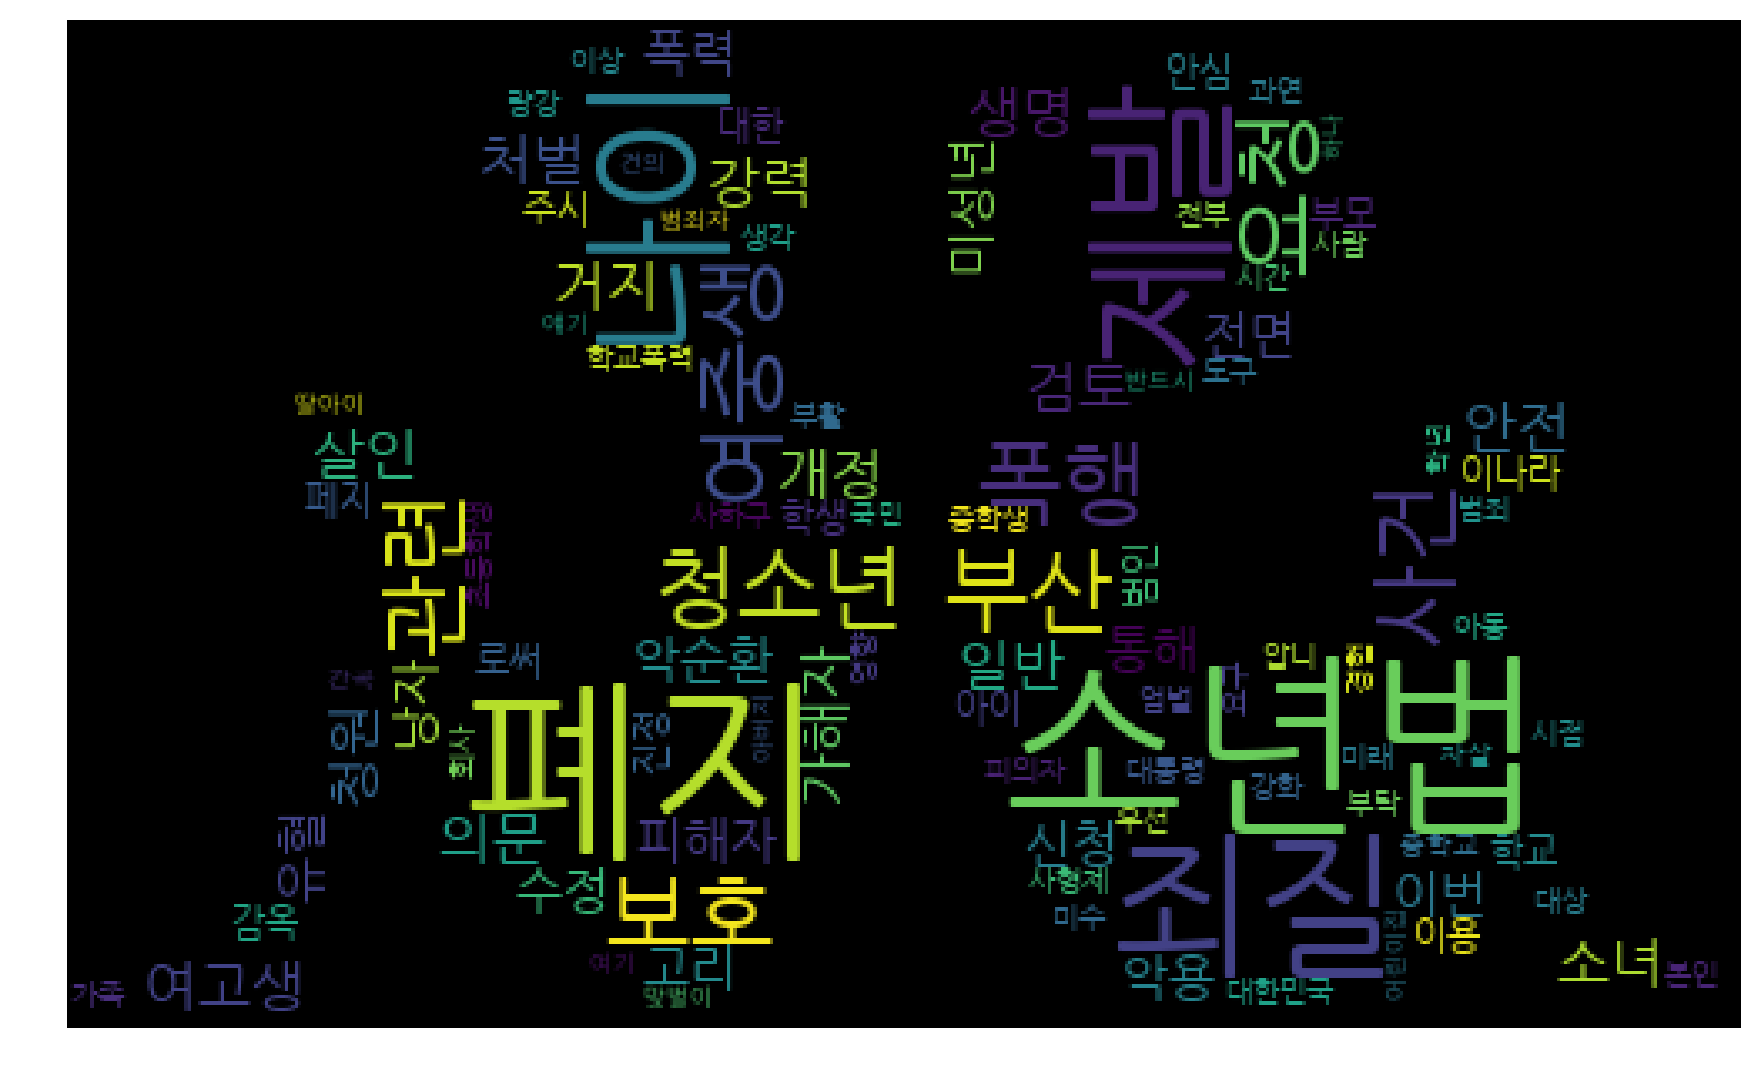

Wall time: 1.94 s


In [21]:
df_2017_09_05=DataFrame()
df_2017_09_05=df.loc[df["start"]=='2017-09-05'][0:200].reset_index()
df_2017_09_05["10word"]=0
for index in df_2017_09_05.index[0:201]:
    nouns=0
    count=0
    lines=df_2017_09_05["title"][index]
    nouns = nlpy.nouns(lines)
    count = Counter(nouns)
    list_10=[]
    for n,c in count.most_common(20):
        if len(n) >= 2 :
            list_10.append(n)
        
    df_2017_09_05["10word"][index]=list_10
d = {}
for words in df_2017_09_05["10word"]:
    for word in words:
        d[word] = d.get(word, 0) + 1
mask_img = np.array(Image.open("child.png"))
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(d)) # 명사뿐만 아니라 모든 형태 단어 출력

C:\Users\hyunho\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


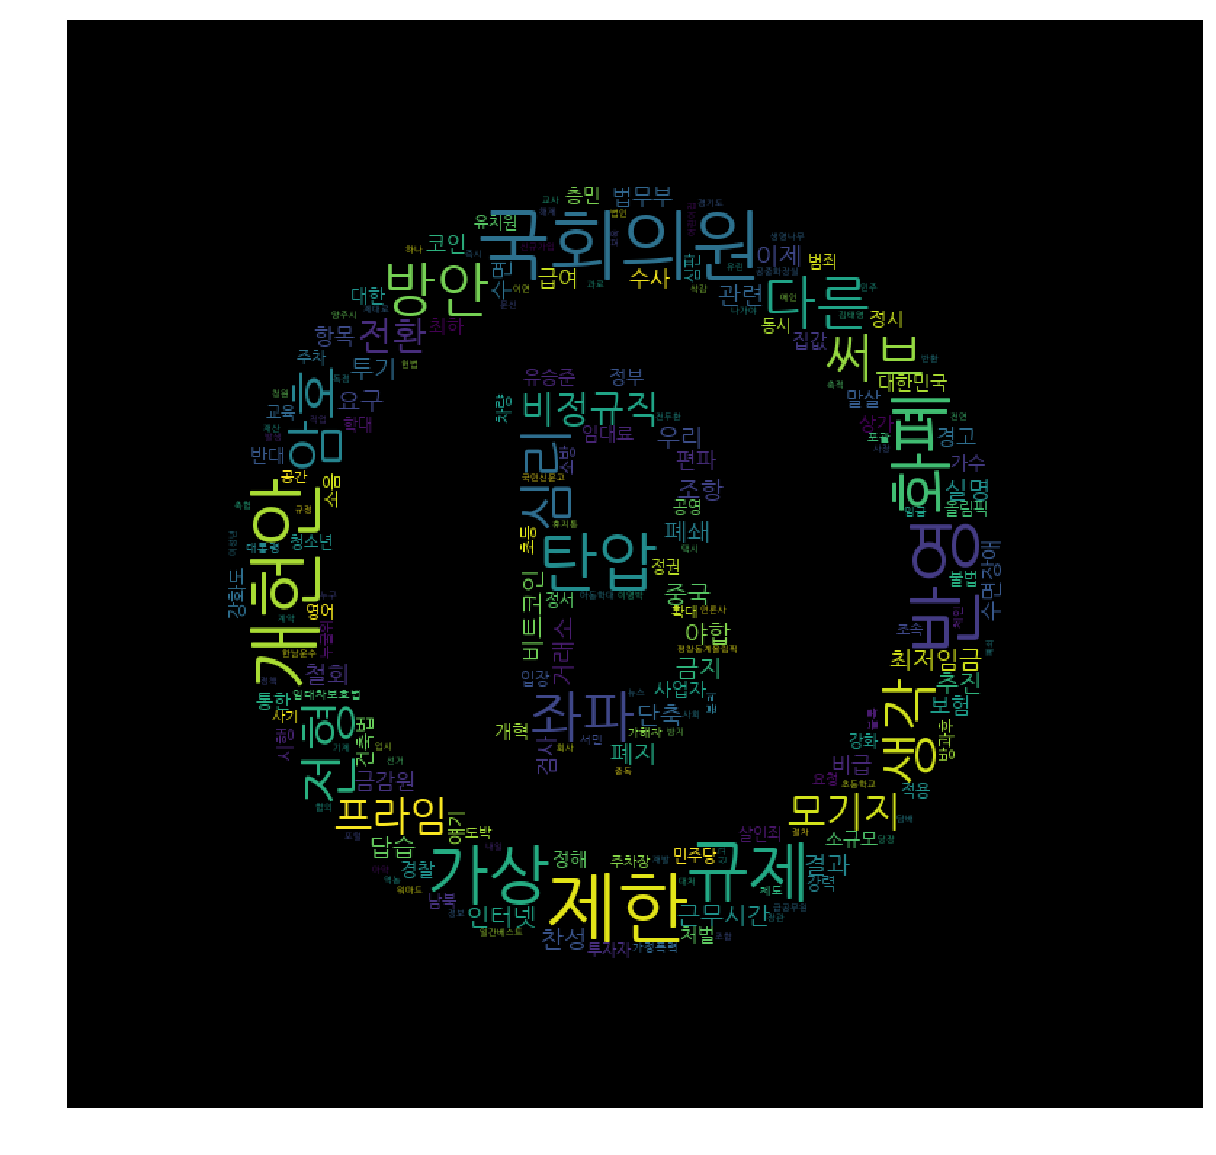

Wall time: 3.98 s


In [22]:
df_2018_01_11=DataFrame()
df_2018_01_11=df.loc[df["start"]=='2018-01-11'][0:200].reset_index()
df_2018_01_11["10word"]=0
for index in df_2018_01_11.index[0:201]:
    nouns=0
    count=0
    lines=df_2018_01_11["title"][index]
    nouns = nlpy.nouns(lines)
    count = Counter(nouns)
    list_10=[]
    for n,c in count.most_common(20):
        if len(n) >= 2 :
            list_10.append(n)
        
    df_2018_01_11["10word"][index]=list_10
d = {}
for words in df_2018_01_11["10word"]:
    for word in words:
        d[word] = d.get(word, 0) + 1
mask_img = np.array(Image.open("coin.png"))
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(d)) # 명사뿐만 아니라 모든 형태 단어 출력

C:\Users\hyunho\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


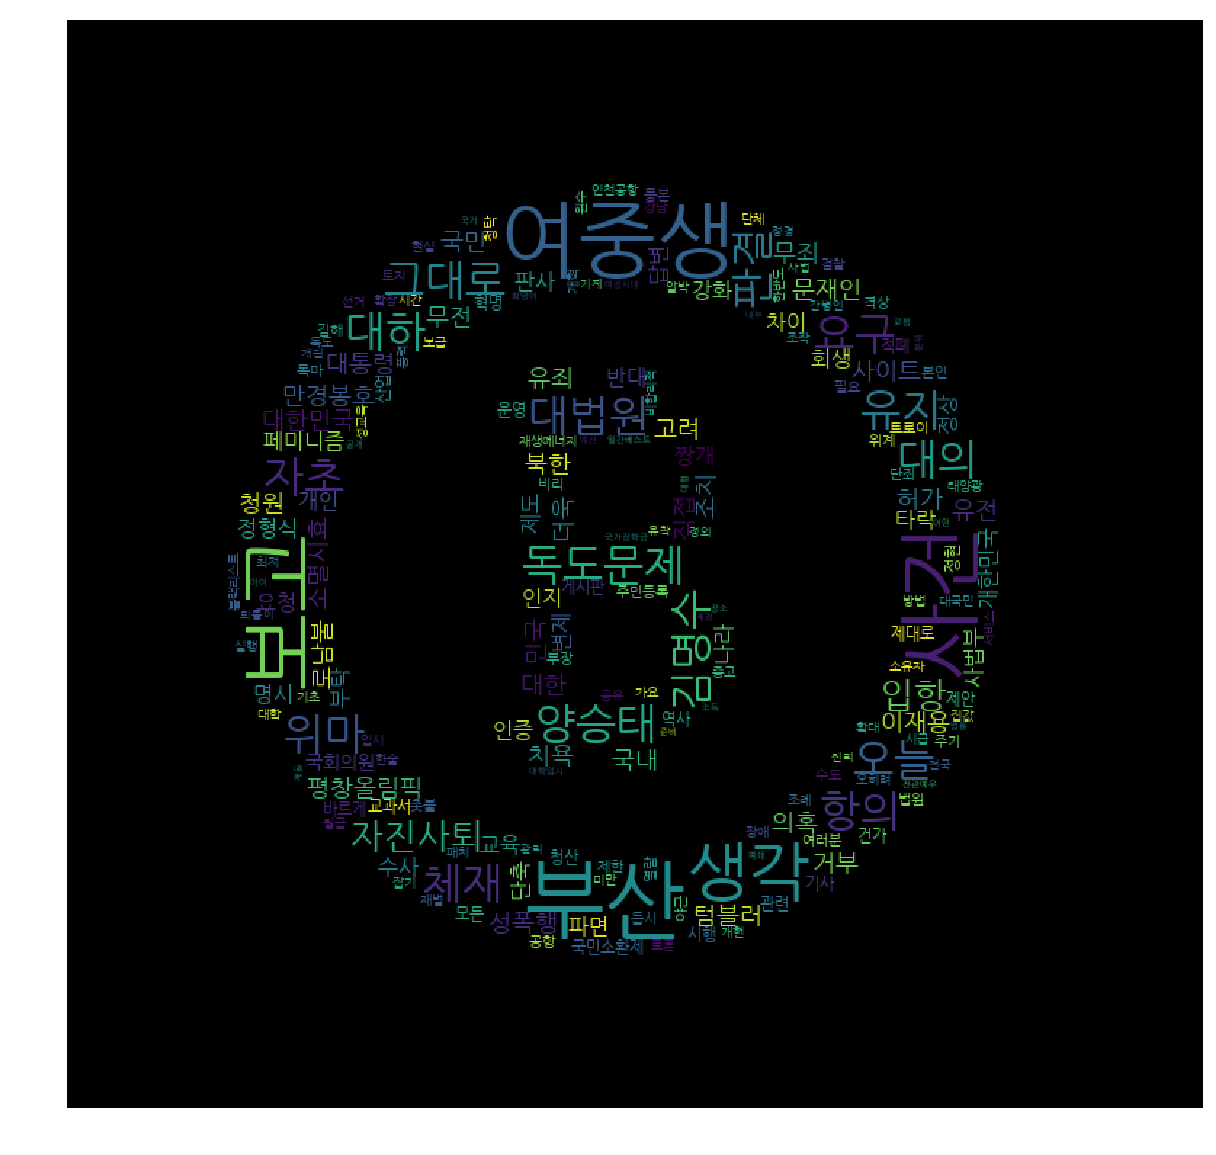

Wall time: 3.4 s


In [23]:
df_2018_02_06=DataFrame()
df_2018_02_06=df.loc[df["start"]=='2018-02-06'][0:200].reset_index()
df_2018_02_06["10word"]=0
for index in df_2018_02_06.index[0:201]:
    nouns=0
    count=0
    lines=df_2018_02_06["title"][index]
    nouns = nlpy.nouns(lines)
    count = Counter(nouns)
    list_10=[]
    for n,c in count.most_common(20):
        if len(n) >= 2 :
            list_10.append(n)
        
    df_2018_02_06["10word"][index]=list_10
d = {}
for words in df_2018_02_06["10word"]:
    for word in words:
        d[word] = d.get(word, 0) + 1

# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(d)) # 명사뿐만 아니라 모든 형태 단어 출력

In [24]:
df_2017_11_11

,index,article_id,start,end,answered,votes,category,title,content,10word
0,30073,31383,2017-11-11,2017-12-11,0,1,정치개혁,이명박 출국금지,이명박 출국금지\n조속한 구속수사,"[이명박, 출국금지]"
1,30074,31384,2017-11-11,2017-12-11,0,3,인권/성평등,조두순 출소 금지,조두순의 출소금지 특별법 제정을 촉구 합니다.,"[조두순, 금지]"
2,30075,31386,2017-11-11,2017-12-11,0,39,정치개혁,이명박 출국금지,정의가 바로 선 나라를 만들기 위해 꼭...!,"[이명박, 출국금지]"
3,30076,31387,2017-11-11,2017-12-11,0,2,정치개혁,이명박출국금지시켜라,명박이을출국금지시키고 수사하라,"[이명박, 출국금지]"
4,30077,31388,2017-11-11,2017-12-11,0,1,정치개혁,이명박출국금지시켜라,명박이을출국금지시키고 수사하라,"[이명박, 출국금지]"
5,30078,31389,2017-11-11,2017-12-11,0,6,정치개혁,이명박 출국금지,MB 수사 급물살 탄다는데 12일 출국한답니다..\n왜! ?why??\n이 시점에...,"[이명박, 출국금지]"
6,30079,31390,2017-11-11,2017-12-11,0,3,정치개혁,이명박 출국금지,이명박 출국금지,"[이명박, 출국금지]"
7,30080,31391,2017-11-11,2017-12-11,0,0,정치개혁,반대,반대합니다,[반대]
8,30081,31392,2017-11-11,2017-12-11,0,3,정치개혁,이명박 출국 금지를 탄원합니다,철저한 수사를 촉구하며 죗값을 치르고 추방되길 진심 바랍니다,"[이명박, 출국, 금지, 탄원]"
9,30082,31393,2017-11-11,2017-12-11,0,0,기타,이명박 출국금지,출국장 문을 다씁니다.,"[이명박, 출국금지]"


In [57]:
d = {}
for words in df_2017_11_11["10word"]:
    for word in words:
        d[word] = d.get(word, 0) + 1

In [58]:
d

{'이명박': 92,
 '출국금지': 80,
 '조두순': 18,
 '금지': 10,
 '반대': 15,
 '출국': 10,
 '탄원': 1,
 '개성': 2,
 '공단': 1,
 '지원': 1,
 '낙태죄': 1,
 '폐지': 8,
 '전대통령': 7,
 '청원': 17,
 '대통령': 11,
 '즉시': 1,
 '구속': 2,
 '긍지': 1,
 '나라': 5,
 '현재': 1,
 '의혹': 1,
 '제기': 1,
 '대한': 2,
 '요청': 3,
 '중동': 1,
 '어쩝': 1,
 '처음': 1,
 '조사': 2,
 '정시': 1,
 '비중': 1,
 '반드시': 2,
 '주거': 1,
 '환경': 1,
 '성범죄': 1,
 '사회': 1,
 '합법': 1,
 '개인': 1,
 '자기': 1,
 '자신': 1,
 '조사해': 1,
 '담뱃세': 1,
 '바로': 1,
 '시기': 1,
 '심신': 1,
 '미약': 1,
 '감형': 1,
 '제도': 2,
 '개선': 1,
 '난방': 1,
 '제대로': 1,
 '올림픽': 1,
 '스타디움': 1,
 '여성': 5,
 '전용': 1,
 '임대주택': 1,
 '제도로': 1,
 '남성': 1,
 '역차별': 1,
 '문제': 1,
 '정이': 1,
 '사형': 6,
 '적용': 1,
 '집행': 4,
 '간통죄': 1,
 '부활': 3,
 '사형제': 1,
 '월남': 1,
 '참전': 1,
 '우회': 1,
 '식주': 1,
 '보조금': 1,
 '병원': 2,
 '본인': 2,
 '경도': 1,
 '고엽제': 1,
 '환지': 1,
 '진도개': 2,
 '테마': 2,
 '파크': 2,
 '한국전력': 1,
 '공사': 1,
 '부산': 1,
 '전체': 1,
 '구조조정': 1,
 '서민': 1,
 '투자': 1,
 '근절': 1,
 '개목줄': 1,
 '현준': 1,
 '사건': 1,
 '형량': 1,
 '일본': 1,
 '국내': 1,
 '문구점': 1,
 '개막': 1,
 '법도': 1,
 

In [57]:
df.loc[df["start"]=='2017-11-11']["title"]

30073                               이명박 출국금지
30074                              조두순 출소 금지
30075                               이명박 출국금지
30076                             이명박출국금지시켜라
30077                             이명박출국금지시켜라
30078                               이명박 출국금지
30079                               이명박 출국금지
30080                                     반대
30081                       이명박 출국 금지를 탄원합니다
30082                               이명박 출국금지
30083                             그놈의 개성공단지원
30084                               이명박 출국금지
30085                                이명박출국금지
30086                          이명박출국금지해야합니다.
30087                                 낙태죄 폐지
30088                               이명박 출국금지
30089                       이명박 전대통령 출국금지 청원
30090                                    이명박
30091                               이명박 출국금지
30092                   이명박 전 대통령 출국금지 청원합니다
30093                   이명박 출국금지 즉시구속 청원합니다.
30094                               이명박 출국긍지
30095     

In [18]:
from collections import Counter
list_10=[]
for word_list in df.loc[df["start"]=='2017-09-05']["title"]:
    for n,c in Counter(word_list).most_common(10):
        if len(n) >= 2 :
            list_10.append(n)        
list_10

[]

In [16]:
from collections import Counter
list_10=[]
word_list=[]
for word in df.loc[df["start"]=='2017-11-11']["title"]:
    word_list.append(word)
list_10=[]
for n,c in Counter(word_list).most_common():
    if len(n) >= 2 :
        print("word :",n)
        print("count:",c)
        print()


word : 이명박 출국금지
count: 2725

word : 이명박출국금지
count: 945

word : 이명박 출국 금지
count: 418

word : 이명박 출국금지 청원합니다
count: 114

word : 출국금지
count: 105

word : 이명박 전대통령 출국금지
count: 91

word : 이명박 출국금지 청원
count: 87

word : 이명박 출금금지
count: 81

word : 이명박
count: 79

word : 이명박 출국금지!
count: 70

word : 이명박 전 대통령 출국금지
count: 70

word : 이명박 출국금지 청원합니다.
count: 68

word : 이명박 출국금지 시켜주세요
count: 67

word : 조두순 출소반대
count: 57

word : 이명박  출국금지
count: 48

word : 이명박 출국금지!!
count: 46

word : 이명박 출국금지 요청
count: 40

word : 조두순 출소 반대
count: 39

word : 이명박 전대통령 출국금지 청원합니다
count: 39

word : 이명박 출국금지!!!
count: 38

word : 이명박 출국금지 해주세요
count: 35

word : ↑↑↑↑MB출국금지는 위에 [[[[[[[[추천순]]]]]]] 가셔서 4번째 글에 댓글로 동의해서 힘을 모아요↑↑↑↑
count: 35

word : 이명박출금금지
count: 33

word : 이명박 출국 금지 청원합니다
count: 28

word : ↑↑↑↑MB출국금지는 위에 추천순 가셔서  4번째 글에 댓글로 동의동의동의↑↑↑↑
count: 28

word : 이명박 출국금지 요청합니다
count: 27

word : 이명박 출국금지요청
count: 26

word : 조두순출소반대
count: 23

word : 이명박전대통령 출국금지
count: 23

word : MB출국금지
count: 22

word : 이명박 출국금지 요청합니다.
co


word : 이명박 출국금지 구속
count: 2

word : MB 출국금지를 청원합니다
count: 2

word : 조두순의 출소를 반대합니다.
count: 2

word : 이명박 출극 금지
count: 2

word : 이명박 출금금지 요청합니다
count: 2

word : 이명박 출국금지 청원요청
count: 2

word : 이명박 출국금지 구속해주세요
count: 2

word : 이명박 출국금지 요청합니다!
count: 2

word : 이맹박 출구금지
count: 2

word : MB 출국금지요청
count: 2

word : 이명박 출국 금지시켜 주세요
count: 2

word : 이명박출국금지 시켜주세요
count: 2

word : 이명박출국 금지 청원
count: 2

word : 이명박 출국금지 부탁드립니다.
count: 2

word : 이명박 출국금지 !!
count: 2

word : 이명박 출국금지해야 합니다!
count: 2

word : 이명박 전대통령 출국 금지!!!
count: 2

word : 이명막 출국금지
count: 2

word : 이명박 대통령 출국금지 청원
count: 2

word : 이명박 출국금지 시켜 주세요
count: 2

word : 이명박 출국금지시켜야합니다
count: 2

word : 이명박 출국금디
count: 2

word : 이명박출금시켜주세요
count: 2

word : MB 출국금지 시켜주세요
count: 2

word : 범죄자 이명박 출국금지 청원
count: 2

word : 이명박이 출금금지
count: 2

word : 명바기 출국금지요~
count: 2

word : mb  출국금지
count: 2

word : 이명박을 출국금지
count: 2

word : 이명박 출국 막아주세요
count: 2

word : 이명박출국금지 청원신청
count: 2

word : 이명박 출국금지 요청드립니다.
count: 2

word : 이명박씨 출국금지 해주세요
count:

word : 이명박 전 대통령!! 출국 금지
count: 1

word : 대마왕쥐각하를 출국금지시켜주세요
count: 1

word : 적폐청산 이명박 출국금지 청원합니다.
count: 1

word : 명박이가 도망가네
count: 1

word : 이명박을 출국금지하고 구속수사 바랍니다
count: 1

word : 이명박 전 대통령 출국 금지!!
count: 1

word : 쥐MB  출국금지시켜라
count: 1

word : 이명박 출국금지 및 구속하라
count: 1

word : 이영박 출금
count: 1

word : 이 명바기 출국금지
count: 1

word : 명박이 출국 금지 @ 명박이 수사철저
count: 1

word : 이명박 출금금지 청원에 동참합니다.
count: 1

word : 이명박 출국금지 및 자원외교 특별수사를 청원합니다.
count: 1

word : 이명박 출국금지 간절히 원합니다
count: 1

word : 이명박출금구속수사하라
count: 1

word : 이명박  출국 금지 청원합니다.
count: 1

word : 이명박 출국 금지  간절히  바랍니다
count: 1

word : 이명박 출국금지. 바로 구속
count: 1

word : 이명박의 죄를 엄중히 조사하고 출국금지 청원합니다
count: 1

word : 이명박 출국 허용 찬성!
count: 1

word : 조두순 출소 반대 청원 합니다.
count: 1

word : 이명박(쥐박) 출국금지 시켜주세요
count: 1

word : 전이명박대통령  출국금지
count: 1

word : 이명박구속수사 출국금지
count: 1

word : 이명박 각하의 출국을 찬성합니다.
count: 1

word : 이명박 출국금지시키거나 영원히 출국시키기 청원합니다
count: 1

word : 바레인은 범죄자인도 요구 안된답니다  이명박 출국금지  시급합니다
count: 1

word : 이명박 구속수사 출국금지
count: 1

word : 이명박

word : 이명박 출국금지 청원합니다!!!
count: 1

word : 이명박대통령 출국금지 청원합니다
count: 1

word : 이명박 출국금지! 확실한 적패청산!
count: 1

word : 이명박 출국 금지 꼭꼭꼭!!!
count: 1

word : 적폐 이명박 출국금지 청원
count: 1

word : 서해건설 부실공사의혹
count: 1

word : 이명박출국금지&차명재산조사
count: 1

word : mb축국금지
count: 1

word : 이명박 출국금지시켜주세요!!
count: 1

word : 이병박 출국 금지!
count: 1

word : 조두순 출소반대 요청!
count: 1

word : 이명박 출구금지 요청
count: 1

word : 이명박출국금지!!!!!시켜주세요!!
count: 1

word : 이명박출국금지 청원합니다!
count: 1

word : 이명박 전임대통령 출국금지 및 수사요청
count: 1

word : 대역무도/매국앞잡이 이명박의 출국을 금지시킵시다
count: 1

word : 이명박쥐 출국  금지
count: 1

word : 이명박 출국금지 시켜야합니다.
count: 1

word : 문재앙 운지를 기원합니다
count: 1

word : 이명박  출국금지 요청합니다
count: 1

word : 이명박 출국 금지 하고 수사 해주십시요!!
count: 1

word : 조두순 법을 개정해서라도 더 가둬주세요
count: 1

word : 이명박 여기로
count: 1

word : 이명박 출국듬지
count: 1

word : 대통령도 증거가 있으면 벌을 받아야합니다
count: 1

word : 이명박 출국금금지 바래요
count: 1

word : 이명박 출국금지 요청이요~~
count: 1

word : 악마를 풀어놓나
count: 1

word : 이명박 출국금지 안하면 도망갑니다.
count: 1

word : 이명박의 출국을 금지 합니다
count: 1

word : 이명박 출

count: 1

word : 명박이 출국금지 요청
count: 1

word : 이명박 츨금금지 신청합니다
count: 1

word : 이명박 전대통령 출금 청원
count: 1

word : 적폐의 몸통 이명박씨 출국 금지 요청
count: 1

word : 이명박 출국금지 청원요청드립니다
count: 1

word : 이명박 출국금지!  다스는 누구겁니까!
count: 1

word : 우리  아이들을  도와주세요ㅜㅜ
count: 1

word : 추천순에 가시면, "자유한국당 위헌정당 해산심판 청구"도 있읍니다.많이들참여해주세요.
count: 1

word : 엠비 출국금지
count: 1

word : 이명박 출국금지건
count: 1

word : 절대 절대 출국시키지 마세요
count: 1

word : 이명박 출금금지및철저한조사해주세요!
count: 1

word : 이명박 출국금지 청원...
count: 1

word : 이명박출국금지는 여기가 아니라 살짝위 '추천순'을 누르시고 스크롤내림나옵니다. 가서 동의!!라고 클릭함되요!
count: 1

word : 이명박 출국금지 할 것을 강력히 요구한다
count: 1

word : 전철 무임승차 폐지하고 사후정산 도입 바랍니다.
count: 1

word : 꼭 이명박 출국 금지해주세요
count: 1

word : 명박이 튀는 금지 꼭!!!
count: 1

word : 이명박 출국금지..청원합니다...
count: 1

word : 이명박 출국 금지 시켜 주세요
count: 1

word : 추천순으로 들어가서 이명박 출국금지 클릭해주세요!
count: 1

word : 이명박 출국금지 ~!!
count: 1

word : 이명박 출금금지 부탁드려요
count: 1

word : 이명박 출금 금지!
count: 1

word : 이명박 출국 금지!!! 적폐청산!!!
count: 1

word : 이나라를 지킵시다
count: 1

word : 이명박 출국 금지 바람니다
count: 1

wo

count: 1

word : 이명박 출국금지 및 구속 동의합니다
count: 1

word : 여기다 하는거 아님  . / / /추천순 밑에 있음
count: 1

word : 'MB 출국금지'
count: 1

word : 이명박 출국금지 꼭 해 주세요.
count: 1

word : 출국금지시켜주세요
count: 1

word : 이명박씨의 출국금지 요청합니다.
count: 1

word : 도배금지! 추천순으로 가서 하세요!! https://www1.president.go.kr/petitions/31254?navigation=best-petitions
count: 1

word : 여기다 글쓰는거아니고 추천순으로 가서 3만명이상 동의한곳에가서 동의글쓰셈
count: 1

word : MB 줄국금지
count: 1

word : 이명박 출구금지! 구속!
count: 1

word : 이명박 출국금지는 여기하는게 아니고 추천순으로 가셔서 3만이상  추천한곳에서 해야합니다 상
count: 1

word : 이명박출국금지해주세요 꼭이요~!!
count: 1

word : 지금 청원하기 누르지 마시고, 추천순으로 가셔서 이명박출국금지 청원에 동의해 주세요!!! 상단 문대통령 사진 바로 밑에 추천순 있잖아요!!!
count: 1

word : 명바기 구속
count: 1

word : 이명박 전대통령은 죄값을 치뤄야합니다
count: 1

word : 이명박 출금 금지 시켜주세요.
count: 1

word : 이명박 구속 - 적폐청산
count: 1

word : <제발> 이명박 출국금지 -> '추천순!!!'으로 가서 3만명 이상 모인 곳에 해야 합니다.
count: 1

word : 이명박 전 대통령 출국금지 합시다
count: 1

word : 여친이 생기게 해주세요
count: 1

word : 평택호
count: 1

word : 한국에는 진정한 보수당이 없습니다. 보수라는 말을 쓰지 말고  다른 이름으로 부릅시다.
count: 1

word : 2016

count: 1

word : 이명박전대통령 출국금지청원입니다
count: 1

word : 이명박은 구속 해야합니다
count: 1

word : 남혐 여혐사이트 제발 없애주세요..
count: 1

word : 이명박 출국 절대금지
count: 1

word : 이명박 전 대통롱 출국금지
count: 1

word : 이명박출금청웡
count: 1

word : 이명박 출국금지해야됩니다.
count: 1

word : 아질 성범죄자 출소 반대
count: 1

word : 이명박 전 대통령 툴국 금지 및 BBK 전면 수사 해야합니다.
count: 1

word : 쥐 출국금지
count: 1

word : 이명박 전 대통령 출국금지 청원합니다!!
count: 1

word : 이명박출국 절대금지
count: 1

word : 이명박 검찰조사가 거의 임박~ 출국금지시켜야
count: 1

word : 이명박 출금금지 청원은 추천순 4번째를 이용하시기 바랍니다.
count: 1

word : 이명박 출금  청원
count: 1

word : 이명박 출국금지 정의실현
count: 1

word : 애는 나오면 앙대여
count: 1

word : 이명박 출국금지 청원이요~!
count: 1

word : 이명박 적폐청산 출국금지 청원합니다.
count: 1

word : 이명박잡자
count: 1

word : 이명박을 구속하자
count: 1

word : 이명박씨 출국 금지 해주세요
count: 1

word : 이명박 출국 금지 나라 망신 그만시키죠
count: 1

word : 이명박을 출국금지 하여주십시요
count: 1

word : 이명박전 대통령출국금지
count: 1

word : 자업자득임!! 똑같이 되돌려주세요
count: 1

word : 이명박 출국금지 구속하라
count: 1

word : 이명박 출국금지와 BBK,사대강,원전  전면 재수사 촉구
count: 1

word : 이명박 전 대통령 출국금지 신청합니다
count: 1

wor

word : 권한과 책임
count: 1

word : 이명박구속~~출국금지~
count: 1

word : 이명작 출국금지 및 구속
count: 1

word : 이명박 전대통령 출국금지를 요청 합니다.
count: 1

word : 이명박 출국금지 시키시오.
count: 1

word : 응급구조사 처우개선
count: 1

word : 이명박 출국 허가되어선  안됩니다.
count: 1

word : 이명박 사기꾼의 출국금지를 요청합니다.
count: 1

word : 이명박 전 대통령 출국 금지 요청
count: 1

word : 이명박가카를 출국금지와 무상급식 꼭 해주세요!!
count: 1

word : 이명박 전 대통령의 출국금지에 대한 청원을 요청합니다.
count: 1

word : 이명박기 출금
count: 1

word : 이명박 출국 금지 및 수사 후 유죄시 처벌. 불법을 뿌리뽑아 주세요
count: 1

word : 이명박 출국금지 & 수사필요
count: 1

word : 이명박 출국금지 추천순으로 가서 해주세요~~
count: 1

word : 이명박출국금지와구속수사
count: 1

word : 이명박 전 대통령의 출국을 금지해주세요/
count: 1

word : 젹 폐 청산
count: 1

word : 이명박 뱅기 타기 직전에 출국금지 ㅡㅡ>  긴급체포
count: 1

word : 이명박을 꼭 구속해 주셔요
count: 1

word : 이명박친구태아건설비리건청원합니다
count: 1

word : 이명박 출국금지 및 긴급체포
count: 1

word : 명박이를 사수하라!!!!
count: 1

word : 이명박출국금지!!구속시켜주세요
count: 1

word : 이명박 출금금지 및 구속!!!!!!!!!
count: 1

word : 이명박 각하님 출국 금지
count: 1

word : 이명박출국
count: 1

word : 조두순출소강력반대
count: 1

word : 적폐청산!
count: 1

word : 

In [17]:
from collections import Counter
list_10=[]
word_list=[]
for word in df.loc[df["start"]=='2017-09-05']["title"]:
    word_list.append(word)
list_10=[]
for n,c in Counter(word_list).most_common():
    if len(n) >= 2 :
        print("word :",n)
        print("count:",c)
        print()

word : 소년법 폐지
count: 292

word : 청소년법 폐지
count: 239

word : 청소년 보호법 폐지
count: 231

word : 소년법폐지
count: 231

word : 청소년보호법폐지
count: 185

word : 청소년보호법 폐지
count: 182

word : 청소년법폐지
count: 149

word : 소년법 폐지해주세요
count: 127

word : 청소년법 폐지해주세요
count: 112

word : 청소년보호법 폐지해주세요
count: 98

word : 청소년 보호법 폐지해주세요
count: 70

word : 소년법폐지해주세요
count: 51

word : 청소년보호법폐지해주세요
count: 39

word : 청소년법폐지해주세요
count: 31

word : 소년법 폐지 해주세요
count: 29

word : 청소년보호법
count: 28

word : 청소년법
count: 25

word : 소년법 폐지해주세요.
count: 23

word : 소년법
count: 22

word : 소년법폐지강력요구합니다
count: 21

word : 소년법 폐지 청원합니다
count: 20

word : 청소년 보호법
count: 19

word : 청소년법 폐지해주세요.
count: 17

word : 부산여중생폭행사건
count: 15

word : 청소년보호법 폐지해주세요.
count: 15

word : 청소년 보호법 폐지해주세요.
count: 15

word : 청소년법 폐지 해주세요
count: 15

word : 청소년보호법 폐지 청원합니다
count: 15

word : 청소년 보호법 폐지 청원합니다.
count: 14

word : 청소년법 폐지 청원합니다.
count: 14

word : 소년법을 폐지해주세요
count: 13

word : 청소년 보호법폐지
count: 13

word : 소년법 폐지를 청원합니다
count: 12

word : 청소년법 페지
count: 12

w

count: 2

word : 부산 여중생사건 강력처벌 부탁드립니다
count: 2

word : 소년법폐지!!!
count: 2

word : 청소년보호법 폐지해주세요!!!!!
count: 2

word : 청소년보호법 폐지 청원
count: 2

word : 청소년법 폐지 부탁드려요
count: 2

word : 청소년보호법은 청소년을 보호하는 법이 아닙니다
count: 2

word : 청소년법 폐지 요청합니다 .  무거운 죄를 받아 마땅합니다
count: 2

word : 소년법 폐지해서 더이상 악마가 나타나지않게 도와주십시오
count: 2

word : 청소년 보호법을 폐지해 주세요!
count: 2

word : 청소년보호법폐지!!
count: 2

word : 청소년법 페지바랍니다
count: 2

word : 소년법 폐지해주세요!!!!
count: 2

word : 청소년법 폐지원합니다.
count: 2

word : 청소년보호법 폐지해주세여!!!
count: 2

word : 청소년보호법 폐지부탁드립니다.
count: 2

word : 청소년법폐지해주세요!
count: 2

word : 청소년보호법폐지해주세요!!
count: 2

word : 청소년 보호법 폐지해야 합니다
count: 2

word : 청소년보호법 폐지해 주세요...
count: 2

word : 청소년보호법으로무고한희생자는그만생겼음좋겠습니다
count: 2

word : 청소년 보호법 폐지를 원합니다
count: 2

word : 청소년법 폐지!
count: 2

word : 청소년보호법 개정해주세요
count: 2

word : 소년법 폐지 동의합니다.
count: 2

word : 소년법 폐지합시다
count: 2

word : 여성도  국방의무를  함께  나눠야 합니다
count: 2

word : 소년법은 폐지되어야합니다
count: 2

word : 청소년보호법철회
count: 2

word : 청소년보호법페지
count: 2

word : 청소년 보호법 폐지해야 

count: 1

word : 청소년들의 '범죄'가 보호되는 법이 청소년 보호법입니까?
count: 1

word : 부산교육청은 아동학대발생 은하자연유치원을 폐원하라!
count: 1

word : 청소년보호법폐지를 원합니다
count: 1

word : 청소년 법  폐지 해야 합니다!!!
count: 1

word : 청소년법 폐지해주세요 (악마는어리지않다)
count: 1

word : 반드시 청소년법은 폐지되야합니다
count: 1

word : 청소년 보호법 악용사태가 심각합니다 제발 폐지해주세요
count: 1

word : 내아이를 위해 청소년법폐지!!
count: 1

word : 제발 청소년 보호법 폐지해주세요!!!
count: 1

word : 사형제 시행
count: 1

word : 청소년법 폐지 청원합니다 !!
count: 1

word : 누구나 생명은소중합니다.
count: 1

word : 소년법 제발 폐지를
count: 1

word : 청소년법 (소년법)폐지에 찬성합니다.
count: 1

word : 부산 여중생 폭행사건의 피해자에 엄중한 처벌을 요구하며 청소년보호법 폐지를 요청합니다.
count: 1

word : 청소년법 해지 되어야합니다
count: 1

word : 여러분 청소년법아니고 소년법폐지해주세요!!!!!!!!
count: 1

word : 청소년법은 반드시 폐지되야합니다.
count: 1

word : 두아이를 키우는 엄마이기에..청소년법 폐지는 꼭..
count: 1

word : 초,중,고등학교 낙후된 컴퓨터실 환경 개선해주세요
count: 1

word : 청소년법 폐지가 청소년을 위한 답입니다
count: 1

word : 청소년법 폐지해 주십시오~~!!
count: 1

word : 청소년법 폐지해야된다
count: 1

word : 소년법 폐지 강력하게 요청합니다.
count: 1

word : 사법시험 존치해야 합니다.
count: 1

word : 청소년보호법을 폐지해야합니다
count: 1

w

count: 1

word : 청소년 보호법 폐지, 사형제 부활
count: 1

word : 개판 잡죠
count: 1

word : 소년법페지 해주세요
count: 1

word : 나라 좀 바로 잡아주세요. 청소년은 희망입니다.
count: 1

word : 청소년 보호법 폐지를 강력히 원합니다
count: 1

word : 청소년보호법 폐지 밑부모교육
count: 1

word : 과거 비행청소년으로 소년원3번 심사원2번 서울구치소1번 다녀왔습니다.  청소년법강화 되어야됩니다.
count: 1

word : 청소년 법 강화를 해주세요
count: 1

word : 소년법폐지(부산여중생폭행사건)
count: 1

word : 징병제 폐지와 모병제 전환
count: 1

word : 청소년법폐지 청원
count: 1

word : 청소년법 페지해주세여
count: 1

word : 청소년보호법 수정해주세요
count: 1

word : 청소년보호법페지를 요구합니다
count: 1

word : 소년법 폐지해주세요 아이를 무서워서 어떻게 키움니까
count: 1

word : 청소년보호법을 폐지
count: 1

word : 청소년보호법폐지신청합니다.
count: 1

word : 청소년 보호법 폐지 합시다.
count: 1

word : 청소년보호법 절대 폐지!!!!
count: 1

word : 소년법 폐지 청원 드립니다
count: 1

word : 범죄자보호해주는나라 강력처벌바람
count: 1

word : 청소년법폐지를 강력히 요구합니다
count: 1

word : [소년법 폐지]부산에 이어 강릉에서도 폭행사건
count: 1

word : 가해자에게 무기이자 방패인 소년법은 폐지되야합니다
count: 1

word : 무고죄의 처벌 강화
count: 1

word : 청소년 보호법 폐지해야한다고 생각합니다 ㅠ
count: 1

word : 청소녀보호법 문제가 많네요
count: 1

word : 아이키우는엄마입니다
count: 1

word :

count: 1

word : 소년법, 청소년보호법 폐지해주세요
count: 1

word : 소년법 폐지 해야 합니다.
count: 1

word : 범죄자 신상공개 및 사진공개
count: 1

word : 청소년관련 법 폐지해주세요
count: 1

word : 청소년법폐지해주세요이건살인입니다
count: 1

word : 청소년 보홍법은 누구를 위한 법인가요?
count: 1

word : 소년법폐지해야합니다.
count: 1

word : 대한민국 이대로는 안됩니다. 소년법 폐지 강력히 요구합니다.
count: 1

word : 청소년법 폐지! 청소년법이왠말입니까
count: 1

word : 소년법. 청소년보호법 폐지 해 주세요
count: 1

word : 부산 피해여중생에 대한 가하학생들 엄중 처벌 바랍니다.
count: 1

word : 청소년보호법 읽어주세요
count: 1

word : 도서정가제 개정이 시급합니다
count: 1

word : 청소년 보호법 당장 폐지해주세요
count: 1

word : 정의를 위해 청소년보호법을 폐지해주세요.
count: 1

word : 부산 청소년 범죄자들 영구 격리하라. 악마와 다름없다.인간이 아니다.금수도 이보다 낫다.
count: 1

word : 행정부처 및 공공기관 내 내부직원용 '자유게시판' 설치 의무화 건의
count: 1

word : 청소년법이고 미성년자 법이고 다 개정되어야 합니다.
count: 1

word : 청소년보호법 페지해 주세요
count: 1

word : 누구를 위한 '전매제도'입니까?
count: 1

word : 미성년자처벌 감경법  없애주세요
count: 1

word : 청소년 보호법 폐지 해주세요!
count: 1

word : 청소년소년법 폐지해주세요~
count: 1

word : 청소년보호법 폐지 및 가해자 신상공개
count: 1

word : 소년법 폐지 요청합니다. (청소년보호법은 해로운 환경으로부터 보호하자는 법이니 소년법으로 다들 정정해주시면 감

count: 1

word : 어민을 말살하는 수협중앙회 위약금제도 조사후 철폐 및 탄원서
count: 1

word : 소년법 페지해주세요
count: 1

word : 중학생 학교 폭력
count: 1

word : 소년법 페지 또는 계정,사형제 부활
count: 1

word : 범죄행위의 처벌에서 인적없이 처벌해야됩니다.
count: 1

word : 청소년 보호법 폐지해주세요..
count: 1

word : 청소년 보호법 폐지, 모두를 위해 시행 되어야 합니다.
count: 1

word : 청소년보호법 폐지 요청드립니다
count: 1

word : 청소년 보호법 폐지 격하게 동의 합니다.
count: 1

word : 소년법은 폐지가 되어야 합니다.
count: 1

word : 청소년법 폐지 간곡히 부탁드립니다
count: 1

word : 청소년을 위한 청소년보호법이 필요합니다.
count: 1

word : 부산 여중생 폭해 가해자 제대로 처벌하고 청소년 보호법 폐지해야합니다. 여기 캐나다에서는 상상 불가한 일입니다.
count: 1

word : 청소년 보호법 폐지-부산 여중생폭행 사건
count: 1

word : 청소년 보호법 폐지 및 개정 해야한다고 생각합니다~!!
count: 1

word : 소년법 폐지를 청원합니.
count: 1

word : '악마는 결코 어리지않다' 청소년 보호법 폐지
count: 1

word : 청소년 보호법 제발짐 폐지 해주세요
count: 1

word : 청소년법  꼭 제발 페지 해주세요
count: 1

word : 청소년 보호법 개선 및 초,중,고 등교시간 개편
count: 1

word : 성희롱 및 성폭력, 그리고 몰카 범죄에 대한 처벌을 강화해주십시오.
count: 1

word : 소년법 폐지를 해야합니다!!!
count: 1

word : 청소년법 폐지를 원합니다
count: 1

word : 문신있는 사람들도 군 간부하고 싶다
count: 1

word : 학부모책임확인서 폐지
cou

count: 1

word : 제발 청소년법폐지합시다
count: 1

word : 건강보험료에 관한 정책 제안입니다.
count: 1

word : 청소년 보호법 폐지 부탁드려요!!!
count: 1

word : 청소년 보호법 폐지를 간곡히 청원합니다.
count: 1

word : 청소년도  성인못지않게 벌을받아야합니다
count: 1

word : 소년법 폐지. 시정 부탁드리겠습니다
count: 1

word : 10월 2일 임시 공휴일 지정 철회를 원합니다
count: 1

word : 청소년들도죄에따라강력처벌해주세요!!
count: 1

word : 소년법으로 오히려 청소년이 고통받고 있어요
count: 1

word : 이래서는...
count: 1

word : 소년법 누구를 위한 법입니까
count: 1

word : 청소년법 누굴 위한법인가 즉각폐지되어야 할 법입니다 더이상어린이가 아니오
count: 1

word : 부산여중생 집단 폭행사건 청소년법 폐지 요청
count: 1

word : 부산 여중생 소녀 가해자들의 강력한 처벌을 원합니다.
count: 1

word : 청소년보호법 폐지로 가해자 일벌백계
count: 1

word : 아동 성폭력자 무기징형
count: 1

word : 청소년 보호법 폐지 청원 합니다!!!
count: 1

word : 보호법 폐지
count: 1

word : 청소년법 폐지해주십쇼. 부탁입니다.
count: 1

word : 소년법및 관련 행정공무원처벌
count: 1

word : 장애인 취업에 대하여
count: 1

word : 청소년을 보호하고싶으면 소년법폐지부터하세요 청소년은 소년법원하지않아요
count: 1

word : 청소년법 폐지해주세요.. 성인과 같이 엄격한 처벌을 해야됩니다.
count: 1

word : 청소년법 폐지 강력 촉구
count: 1

word : 청소년보호법은 폐지해야합니다.
count: 1

word : 청소년 보호법 폐지 요청합니다.
count: 1

word : 

count: 1

word : 청소년법은 폐지 되어야 합니다.
count: 1

word : 청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 청소년 보호법은 폐지해야합니다
count: 1

word : 청소년 법 폐지 해야 합니다.
count: 1

word : 나라를 나라답게 이번 부산여중생폭행사건 청소년 보호법 폐지
count: 1

word : 시대에 맞게 법을 고쳐야 합니다. 요즈음 청소년은 청소년이 아닙니다. 다 이성이 있고 생각하는 사람입니다.
count: 1

word : 한부모가정 미혼미
count: 1

word : 제발 청소년보호법폐지...
count: 1

word : 많은사람들이 소년법폐지를 바랍니다
count: 1

word : 청소년 보호법 폐지해주세요 !!! 꼭!!!!!!
count: 1

word : 우리아이들의 미래를 위해서라도 "청소년"법은 폐지해야합니다.
count: 1

word : 미필자에게 병역세를 부과해야합니다.
count: 1

word : [소년법 개정/폐지 요구]
count: 1

word : 소년법폐지  찬성
count: 1

word : 청소년 법 폐지 해야 합니다.  가볍게 여기지 말아주세요
count: 1

word : 소년법 폐지되야합니다.
count: 1

word : 여성 기초군사훈련 제도를 실시해야 합니다.
count: 1

word : 국가유공자 예우에 관한 법률
count: 1

word : 청소년법 폐지 부탁드립니다 ㆍ
count: 1

word : 이번 사건으로 인해 대한민국의 미래가 달라질 수 있는 시발점이 되길
count: 1

word : 청소년법 폐지 청원합니다.  제발
count: 1

word : 청소년법폐지동의합니다.
count: 1

word : 청원 게시판 블록현상 심화 자유롭게 글남길수있게 해주시기 바랍니다.
count: 1

word : 이번학생사건 살인미수입니다 살인자들
count: 1

word : 청소년 보호법 폐지건에관해
count:

count: 1

word : 부탁드립니다
count: 1

word : 소년법 반드시 폐지해주세요
count: 1

word : 소년,청소년 관련법 10가지 모두 동일화 시켜주십시오.
count: 1

word : 소년법, 청소년보호법 폐지 혹은 개정을 요청합니다
count: 1

word : 청소년 보호법 폐지해주시기 바랍니다.
count: 1

word : 부산 여중생 폭행 형사미성년자 나이 조정해주세요
count: 1

word : 청소년법폐지 신청합니다.
count: 1

word : 소년법 당장 폐지해주세요!!
count: 1

word : 소년법 폐지 동의합니다
count: 1

word : 소년법 개정을 청원합니다
count: 1

word : 소년법 페지 !!!해주세요
count: 1

word : 부산 여중생 폭행사건 청소년 예외 법을 만들어주세요.
count: 1

word : 소년법 폐지요구합니다!
count: 1

word : 소년법을 페지해주세요
count: 1

word : 삼성생명 갑질과. 한화생명 보험금 미지급
count: 1

word : 부산중학생강력처벌
count: 1

word : 소년법 개정해 주세요~
count: 1

word : 청소년보호법  폐지해주세요!
count: 1

word : 청소년 보호법 폐지 및 청소년 범죄 처벌 강화
count: 1

word : 부분 요일제 공휴일을 제안합니다.
count: 1

word : 해킹조직과 결합한 범죄조직과 같은 충남 당진시 흥신소를 전면 수사해주기 바랍니다.
count: 1

word : [청소년법 폐지] 국민들의 목소리를 귀 기울여 주세요.
count: 1

word : 청소년 보호법 폐지/수정 요청.
count: 1

word : 청소년법 폐지 신청합니다.
count: 1

word : 보호받아야 할 명분과 권리가 있는 인간만을 보호해 줍시다.
count: 1

word : 청소년법 강화 청원 합니다
count: 1

word : '부산 사하구 여중생 폭행 사건' 관

count: 1

word : 청소년 보호법 폐지!...
count: 1

word : 음주후 범행시 가중처벌을 원합니다.
count: 1

word : 청소년벚 페지바랍니다
count: 1

word : 부산여중생폭행사건. 청소년법폐지
count: 1

word : 소년법 없애주세요!!!
count: 1

word : 청소년법말고 소년법 폐지해주세요.
count: 1

word : 청소년보호법폐지,특히 이번부산여중생가해자 강력처벌요청
count: 1

word : 청소년보호법을 폐지해주세요.
count: 1

word : 미성년자 처벌 법 개정
count: 1

word : 소년법 폐지/ 대상연령 조정을 청원합니다.
count: 1

word : 청소년보호법과 소년법폐지
count: 1

word : 청소년법 페지원해요
count: 1

word : 교육정책이 이게 뭡니까
count: 1

word : 말도 안되는 청소년보호법 폐지해주세요
count: 1

word : 여자군대가자
count: 1

word : 청소년법 폐지 페지 폐지
count: 1

word : 청소년법 이제는 가만히 있을수 없습니다
count: 1

word : 청소년보호법과 소년법을 폐지해주세요
count: 1

word : 청소년법 지금 당장 폐지 원합니다
count: 1

word : 청소년 보호 폐지 바랍니다
count: 1

word : 청소년보호법 폐지하자
count: 1

word : 청소년 보호법 폐지 및 동물보호법 강회
count: 1

word : 청소년법폐지를 간곡히 청원합니다
count: 1

word : 대구 남학생 자살사건 기억하시나요 소년법폐지 해야합니다
count: 1

word : 소년법을폐지하여주세요
count: 1

word : 소년법 폐지 (부산 여학생 폭행사건 관련)
count: 1

word : 청소년보허법폐지
count: 1

word : 소년보호법
count: 1

word : 소년법을 제발 폐지해주세요
count: 1

word : 청소년보호

count: 1

word : 제발 내 새끼들.모든 자식들 안전하게 자랄수있게 범죄자 양성 그만합시다
count: 1

word : 세월호참사에 대해 확실하고 실체적인 진상규명에 나서길 촉구합니다.
count: 1

word : 같은 청소년으로써 청소년 보호법폐지는 옳다고 생각합니다
count: 1

word : 청소년 보호법 폐지 찬성
count: 1

word : 소년법 폐지를 간곡히 청원드립니다.
count: 1

word : 청소년보호법 폐지가 시급합니다. 정말 청소년들 날이갈수록 도를 넘는군요
count: 1

word : 청소년법 폐지  제발합시다
count: 1

word : 군동성애 폐지
count: 1

word : 청소년보호법폐지를청원합니다
count: 1

word : 미사일군 창설
count: 1

word : 진짜 법은 바껴야 한다고 생각합니다 .
count: 1

word : 소년법 폐지를 간곡히 부탁드립니다
count: 1

word : 우리나라 법의 관대함
count: 1

word : 대통령님 청소년법 폐지해주세요
count: 1

word : 청소년으로서
count: 1

word : 저희 청소년좀 살려주세요
count: 1

word : 청소년법 폐지 청원드립니다.
count: 1

word : 세금 체납 가산세 해결해주세요..
count: 1

word : 동물들을함부로대해요
count: 1

word : 장애등급기준 완화
count: 1

word : 범죄자엔 나이가 없습니다! 청소년 폭행을 멈춰주세요!
count: 1

word : 청소년으로서 말합니다
count: 1

word : 자유의 적에게도 자유가 필요하긴 합니다만..
count: 1

word : 경찰 사건 설명과 수사 진행 현황공개하도록 해주세요.
count: 1

word : 청소년보호법 폐지 부탁합니다.
count: 1

word : 자유한국당해제처리
count: 1

word : 청소년법 폐지를 바랍니다.
count: 1

word : 지금도 어디선가 일

In [18]:
from collections import Counter
list_10=[]
word_list=[]
for word in df.loc[df["start"]=='2018-01-11']["title"]:
    word_list.append(word)
list_10=[]
for n,c in Counter(word_list).most_common():
    if len(n) >= 2 :
        print("word :",n)
        print("count:",c)
        print()

word : 가상화폐 거래소 폐지 반대
count: 52

word : 가상화폐
count: 40

word : 가상화폐 거래소 폐지 반대합니다.
count: 38

word : 가상화폐 폐지 반대합니다
count: 37

word : 가상화폐 폐지 반대
count: 34

word : 가상화폐 폐지반대
count: 27

word : 가상화폐 거래소 폐쇄 반대합니다.
count: 18

word : 가상화폐 거래소 폐쇄 반대
count: 15

word : 가상화폐 폐지를 반대합니다.
count: 15

word : 가상화폐 폐지 반대합니다.
count: 15

word : 가상화폐 규제 반대
count: 14

word : 가상화폐 거래소 폐지 반대합니다
count: 14

word : 가상화폐 거래소 폐지를 반대합니다.
count: 12

word : 가상화폐 거래 폐쇄 반대합니다
count: 12

word : 비트코인건들지말아주세요
count: 10

word : 가상화폐 폐지반대합니다
count: 9

word : 가상화폐 거래소 폐지반대
count: 9

word : 가상화폐거래소 폐지 반대합니다
count: 9

word : 이것이 문재인 정부의 정책 결정 방식은 아니라고 생각하고 싶습니다.
count: 9

word : 가상화페
count: 8

word : 가상화폐거래소 폐지 반대합니다.
count: 8

word : 가상화폐거래소 폐지 반대
count: 8

word : 가상화폐거래소폐지반대합니다
count: 8

word : 가상화폐거래소폐지반대
count: 8

word : 가상화폐거래소 폐지 반대합니다!
count: 8

word : 가상화폐 거래소 폐쇄 반대합니다
count: 7

word : 가상화폐 규제 반대합니다
count: 7

word : 가상화폐거래소 폐쇄를 반대합니다.
count: 7

word : 가상화폐 규제 반대합니다.
count: 7

word : 가상화폐 거래소 폐쇄반대
count: 7

word : 가상화폐거래

count: 1

word : 기자회견
count: 1

word : 자유한국당을 없애 주세요
count: 1

word : 이주노동자도 잘 살 권리가 있습니다
count: 1

word : 대법원행정처의 재판문서조작 법죄행위
count: 1

word : 822부동산정책 규제좀 완화시켜주세요
count: 1

word : 국제 제판에 위안부 피해자 당사자포함되지 않은  "위안부 외교문제" "불가결 판정" 을 판정 해 달라고 합시다
count: 1

word : 불법체류자의 명칭을 바꿔주세요
count: 1

word : 살인죄 형량을 높여주십시오
count: 1

word : 청소년 성폭행
count: 1

word : 정권만 바뀐다고 되는게 아니군요
count: 1

word : 우리 PK 시민들은 문재인 대통령님을 적극 지지합니다.
count: 1

word : 교육부, 여가부에서 다문화가족은 이중언어교육하고 국민의가족은 영어교육금지가 말이 됩니까
count: 1

word : 청년및국민창업일자리를위한 프로그램제안
count: 1

word : 집값ᆢ폭등
count: 1

word : 일자리부위원장은 공직자로서 선거활동  그만해야합니다!
count: 1

word : 광주 버스 노선 재개편 원합니다
count: 1

word : 아이들의 방과후 영어교육 금직 철회부탁드립니다
count: 1

word : 금형의미래
count: 1

word : 억울합니다
count: 1

word : 환경부를 환경경제부로 구조조정하는 제안
count: 1

word : 아이돌 인기투표 (가온차트등)
count: 1

word : 국민신문고 만족도 조사 업무평점에 가산해주세요
count: 1

word : 청소년알바 채용을 확대해주세요.
count: 1

word : 기본예절은 어린이집,유치원에서부터시작
count: 1

word : 외국인노동자와 조선족 과다도입
count: 1

word : 스포츠 스타들의 병역문제
count: 1

word : 천민 자본주의를 뜯어 고

count: 1

word : 가상화폐좀 만편히 하게해주세요
count: 1

word : [가상화폐]반대하는인간들아....
count: 1

word : 국민들의 목소리를 들으세요! 가상화폐 규제 철회!
count: 1

word : ■■■■■가상화폐 막아야됩니다.■■■■■■■■■■
count: 1

word : <가상화폐규제 반대>
count: 1

word : 블록체인기술과 암호화폐거래로 세계금융기술시장의 선도국가가 되길바랍니다.
count: 1

word : 부동산투기부터잡읍시다!!!
count: 1

word : 방과후 영어 폐지가 소통의 답 입니까?
count: 1

word : 가상화폐 폐쇄 하라는 슈퍼 갑 코스닥, 코스피 사장들 말만 듣는 문재인 정부
count: 1

word : 현금결제 유도가 불법입니까? 대기업을 위한 법은 개정이 필요합니다
count: 1

word : 택시회사사납금좀내리게해주십시요
count: 1

word : 아파트 관리비 부가가치세  폐지를 청원합니다
count: 1

word : 소설쓰는 법무부
count: 1

word : 문재인 대통령님 포함 역대 대통령님들 도대체 왜 매번 항상 말들로만 정치하시나요?
count: 1

word : 주식은 괜찮고 가상화폐는 도박이다? 중국보다 더 후진국 대한민국 현실입니다.
count: 1

word : 가상화폐 폐쇄는 국민의 재산권 침해이자, 정부와 국민사이의 불협화음의 발생의 시발점이 될것이다.
count: 1

word : 주민센터업무처리...
count: 1

word : 당신들의 이익때문에 203040세대를 죽이지마십쇼
count: 1

word : 금감원 법무부 그리고 언론사 직원들 가상화폐 계좌 철저히 조사해라
count: 1

word : 간통법 부활
count: 1

word : 가상화폐 거래하는사람은 구속시켜주세요
count: 1

word : 가상화폐에 관련
count: 1

word : 가상화폐 거래소 폐쇄 절대 불가
count: 1

word : 모든 투기

count: 1

word : 가상화폐 규제 즉각 철회하라!
count: 1

word : 세계의 흐름을 거부하는 대한민국
count: 1

word : 가상화폐 폐지에 대한 고려
count: 1

word : 가상화폐 폐지반대, 법무부 장관,금융감독원 사퇴 하라~~~
count: 1

word : 우리나라 사람들에게 일자리를 제공해주세요.
count: 1

word : 박상기 법무부장관 해임건의
count: 1

word : 가상화폐 패지가 일하는건가?!
count: 1

word : 모든 도박관련 거래 금지 특별법 추진 요구
count: 1

word : 한국식 나이 계산법을 없애주세요.
count: 1

word : 가상화폐 폐지  반대합니다
count: 1

word : 가상화폐말고, 부동산이나 좀 잡아주세요.
count: 1

word : 초등학교 방학기간을 줄여주세요
count: 1

word : 가상화폐 패쇄?하실꺼면 진짜하세요
count: 1

word : 가상화폐 폐지 강력반대. 이번 지방선거때 봅시다.
count: 1

word : 가상화폐만 도박이고 강원랜드, 스포츠토토, 로또, 경마, 부동산 투기는 도박 아니고 정당한 겁니까?
count: 1

word : 이석기 석방 반대 청원
count: 1

word : 가상화폐 패지 반대
count: 1

word : 가상화폐 민주적으로 할수 있게 해주세요....
count: 1

word : 정부 때문에 지금 전재산 잃고 있는 서민들이 얼마나 많은지 아세요?
count: 1

word : 가상화폐 거래소 폐쇄 반대청원합니다
count: 1

word : 서민을 위한 정부는 어디갔나요?
count: 1

word : 비비탄총 규제 완화
count: 1

word : 가상화폐 폐지해야합니다
count: 1

word : 비트코인정책 진짜노답입니다
count: 1

word : 비트코인  사업자  허가를 내주지말던지
count: 1

word : 가상화폐 거래소 폐지는 안된다.
count: 1

wor

count: 1

word : 암호화폐.블록체인 패쇄반대
count: 1

word : 암호 화폐 거래소 폐지 반대합니다.
count: 1

word : 암호화폐 폐쇄 하기전..(부동산투기.강원도카지노.토토.증권)같이 폐쇄하라
count: 1

word : 가상화폐규제 피해보상해주세요
count: 1

word : 여기가 공산주의 입니까? 문재인 장군님?
count: 1

word : 자동차 전용도로 왜 있는 겁니까?
count: 1

word : 가상화폐 거래소를 폐지한다구요???
count: 1

word : 가상화폐 폐지는 단계적으로 하시길 바랍니다
count: 1

word : 가상화페 거래소패쇄 를 반대 합니다
count: 1

word : 정말 생각도 없고 대책도 없고
count: 1

word : 가상화폐 버블? 정부가 폭락을 주도하고 있으며 국민들은 손해를 보았다. 손해 보상하라
count: 1

word : 국민재산권침해
count: 1

word : 가상화폐를 규제하는건 옳지않습니다.
count: 1

word : 가상화폐 거래소 폐지를 반대합니다!!!
count: 1

word : 가상화폐거래소 폐쇄? 그럼 전국 부동산 다 폐쇄 시키고 주식시장 닫아주세요!
count: 1

word : 가상화폐 거래 폐지를 반대합니다
count: 1

word : 가상화폐거래소 폐쇄할거면 강원랜드 폐쇄, 개인들 주식 공매도 가능하게 해주세요
count: 1

word : 가상화폐 폐쇠 반대합니다
count: 1

word : 가상화폐 폐지를 철회해주세요..
count: 1

word : 가상화폐거래소 폐쇄할람 경마장 강원랜드 주식 부동산투기도 없애라
count: 1

word : 다시는 현정부 지지하는일 없을겁니다.
count: 1

word : 가상화폐 거래소 폐쇄는 옳지 않습니다. 철회해주세요.
count: 1

word : 가상화폐 규제안에 대하여..
count: 1

word : 가상화폐 폐쇠 철회 하라~대한민국은 공산주의 입니다.
count: 1


count: 1

word : 거래소폐쇄
count: 1

word : 가상화폐 뭘했다고 이렇게 빨리 분석하여 나갈길도 없이 빠른 발표를 하나요?
count: 1

word : 수원중앙기독중학교 학급증설 부결사유
count: 1

word : 초등 입학할 시기에도 휴직이 필요합니다.
count: 1

word : 가상화폐가 도박이면!!! 경마장 강원랜드 주식시장도 같이 폐쇄 하십쇼!!!
count: 1

word : 영화관 좌석을 알파벳순이 아닌 가나다순으로 바꿔주세요~~
count: 1

word : 가상화폐 피해자끼리 모여 국가를 상대로 소송하세요
count: 1

word : 어떻게든 대한민국 사람에게 고통줄려는 당신들 마음은 압니다. 가상화폐 폐지 반대.
count: 1

word : 가상화폐 거래소 폐지 위헌입니다.
count: 1

word : [거래소폐지 반대] 가상화폐 거래소폐지 반대합니다.
count: 1

word : 법무부장관 박상기 화폐 급락/급등 조작 및 증권/지인들과 협의 등에 대한 조사 요청 합니다.
count: 1

word : 학교방학 기간 중 교사 월급 지급 문제
count: 1

word : 가상화폐거래소 폐지
count: 1

word : 정부의 지속적인 가상화폐 말바꾸기로 인한 손해액에 대한 단체 배상을 청원합니다.
count: 1

word : 박상기 법무부장관 접대및 부동산 관련 수사 의뢰 합니다
count: 1

word : 서민을 바다에 내던지는 꼴입니다!!!
count: 1

word : 가상화폐 폐지  막아주세요. 제발!
count: 1

word : 가상화폐 폐지 발언으로 막대한 손실 및 시장의 혼란이 오고 있습니다.  시장자율에 맡겨주세요.
count: 1

word : 가상화폐 폐지가 정말 답인것인가? 서민들죽이는 행위
count: 1

word : 비트코인 거래소 폐지 찬성합니다.
count: 1

word : 법무장관 해임 청원요청
count: 1

word : 가상화폐 거래소 폐쇄  반대반대
count

count: 1

word : 가상화폐=바다이야기 블록체인기술과 가상화폐도박 구분합시다
count: 1

word : 박상기 장관 해임 요구
count: 1

word : 가상화폐를 독단 발언한 금감원장과 법무부장관의 계좌거래내역 조사를 강력이 요구합니다.
count: 1

word : 법무부의 일방적 가상화폐 거래소 폐지는 국민의 재산권 침해입니다.
count: 1

word : 두루누리사업 너무 속상해요...돈없는 자영업자들에게 힘을주세요
count: 1

word : 가상화패 거래서 폐지 반대
count: 1

word : 탄핵당하고싶으면 폐지하시오
count: 1

word : 비트코인이왜도박인지요?  그럼 주식은도박이아닌가요?
count: 1

word : 가상화폐 폐지 반대합니다~
count: 1

word : 가상화페 거래소페쇄 반대합니다.
count: 1

word : 가상화폐에 대한 무조건적 폐쇄조치는 합리적이지 못하다고 생각 합니다.
count: 1

word : 원화 가상화폐
count: 1

word : 가상화폐 규제 반대및 박상기 법무부장관 해임
count: 1

word : 카지노 주식해서 돈버는 개미 몇프로 될거라봅니까
count: 1

word : 가상화폐 거래소 폐지 반대합니다. 공산당과 다를게없습니다.
count: 1

word : 가상화폐 폐지에 절대 반대합니다.
count: 1

word : 가상화폐 거래소 폐지를 강력히 반대합니다
count: 1

word : 가상화폐 폐쇄반대
count: 1

word : 구원파   박옥수  정부에서  조사좀   해주시길  바랍니다..
count: 1

word : 가상화폐 거래소 폐지에 반대합니다.
count: 1

word : 가상화폐 거래소 폐쇄 및 제제 반대합니다
count: 1

word : 문재인 대통령 탄핵
count: 1

word : 가상화폐폐지 반대
count: 1

word : 한국이 공산 국가 입니까? 가상화폐 거래 차단?
count: 1

word : 가상화폐 폐지

count: 1

word : 부가가치셏카드납부시 수수료부담
count: 1

word : 가상화폐폐쇄 정부의 독단적판단은 옳지 않습니다.
count: 1

word : 거래소폐쇄 중국공산당도 아니고 대책이 뭐 이럽니까
count: 1

word : 박상기 사표써라
count: 1

word : 코인 거래에 대한 시급한 규제를 강력히 청원합니다!
count: 1

word : 가상화폐 거래소 폐지 바랍니다.
count: 1

word : 가상화폐 그냥 놔두세요 자유민주주의국가입니다
count: 1

word : 가상화폐거래소 폐지 반대합니다....
count: 1

word : 법무부장관, 금감원장 해임 건의안
count: 1

word : 가상화페 폐지 반대합니다
count: 1

word : 가상화폐 거래소 폐지를 하는 이유를 알고 싶습니다.
count: 1

word : 가상화폐 규제 하지 말아주세요
count: 1

word : 가상화폐 투자자는 국민도 아니야?
count: 1

word : 대한민국 국민으로써. #대한민국 국민 청원글 , 가상화폐
count: 1

word : 눈치 보지 말고 거래소 그냥 폐지 하세요
count: 1

word : 가상화폐 거래소 폐지 반대 (일단 법무부는 공부부터 하세요)
count: 1

word : 강원랜드는요? 경마, 경륜은요? 부동산은 좀 잡으셨나요? 민주당지지 철회합니다.
count: 1

word : 미래를 보지 않는 극단적인 판단 가상화폐 반대합니다
count: 1

word : 가상화폐시장도 주식시장처럼 제도화해야합니다.
count: 1

word : 금번 제천 화재 진압 소방 지휘자들의 징계를 취소해 주세요!
count: 1

word : 가상화폐 거래소 폐쇄 반대합니다!!
count: 1

word : 청와대가 가상화폐 작전세력인지 조사 바랍니다.
count: 1

word : 좋은나라만들기
count: 1

word : 비트코인을 왜 자꾸 못살게하나요?
count: 1

word : 모든 공무원 통

count: 1

word : 가상화패 패지 규제 반대 합니다
count: 1

word : 가상화폐거래소폐지반대.
count: 1

word : 가상화폐 거래소 폐쇄 해주시구, 부동산 중개업 없애주세요
count: 1

word : 북미 비트코인 컨퍼런스, 가상화폐로 티켓 판매 중단
count: 1

word : 비트코인 금지,절대금지
count: 1

word : 세계인의 조롱거리 Mr. Park
count: 1

word : 강남 아파트값이 오르는 메커니즘은 이러합니다. 아파트값을 잡아주세요.
count: 1

word : 가상화폐자유권주세요 주식을폐쇄하십시오
count: 1

word : 청와대 직원과 고위공무원의 가상화폐 거래 내역 조사해 주세요
count: 1

word : 함부로 입을 놀리는 경제사범 3인 최종구/최흥식/박상기 3분에 대하여 세무조사, 그리고 주식 투기 및 부동산 투기
count: 1

word : 가상화페 거래 막아주세요
count: 1

word : 가상화폐 폐쇄 반대~!
count: 1

word : 가상화폐 거래소 폐쇄 결사 반대!! 양성화, 제도화 부탁합니다.
count: 1

word : 업비트 1000억 원 사태 당장 해명하세요.
count: 1

word : 변호사라 법무부와짜고 머하는짓입니까???
count: 1

word : 거래소 폐지한다면서 국가가 왜 오늘 매수했습니까
count: 1

word : 가상화폐가시장바구니든동내아줌마들까지투기판에끌어들이고있어요.
count: 1

word : 불로 소득 비트코인 불건전 거래소 정리 찬성합니다.
count: 1

word : 가상화폐 거래하시는 여러분
count: 1

word : 한국식 나이 폐지 부탁드립니다.
count: 1

word : 국회의원 월급 인하 (최저임금으로 월급 맞추기) 및 퇴직하고 다달이 월급 나오는 시스템 폐지 해주세요
count: 1

word : 비트코인(가상화폐) 폐지반대합니다 그리고 박상기 법무부장관과 금감원장 최흥식 해임 및 조사
cou

count: 1

word : 지금 6만3천명입니다 가상화폐 이십만 되야 합니다
count: 1

word : 가상화폐 투기자들 양심 좀 가지자 제발
count: 1

word : 거품이 깨지기 전에 선조치 하지않으면  현 정부 책임입니다.
count: 1

word : 공정성 없는 JTBC골든디스크를 폐지해주세요
count: 1

word : 가상화폐에 세금을 붙인다? 어떻해든 세금이나 쪼아보려고
count: 1

word : 오늘법무부 장관의 경솔함과 현정부의 무능함을 본것같습니다.
count: 1

word : 가상화폐거래정지 추진을 강력히반대합니다.
count: 1

word : 태어나 처음으로 청원을 남깁니다.
count: 1

word : 나라의 미래를 위해
count: 1

word : 비트코인 규제를 원합니다. 거래소 폐지 찬성
count: 1

word : 가상화폐 반대자 본인은 못하고 남돈버는거만 배아픈 사람들
count: 1

word : 암호화폐 거래소 폐지 결사반대합니다
count: 1

word : 개인의 선택권을 보장 해라
count: 1

word : 가상화폐 거래소 폐지 꼭 부탁드립니다. 기술은 얼마든지 발전시킬수 있지만 투기에는 절대 네버 거래소 페지 적극 지지 합니다!!
count: 1

word : 가상화폐 폐지 절대 반대입니다!
count: 1

word : 법무부장관이 거짓말 합니다. 자격있습니까 ?
count: 1

word : 2011년(?) 농협의 전산장애 (DDOS 공격 이라 일컬었던) 를 자세히 조사하여 MB 와의 연관성을 밝혀주세요.
count: 1

word : 법무부 장관 충분의 논의 되지 않은 발표로인해 증발한 107조 대하여 책임 지시고 가상화폐 규제에 대하여 일관된 입장을 표명해주시기 바랍니다.
count: 1

word : 장관이란사람들이 말한마디에 신중을
count: 1

word : 가상화폐거래소폐쇄소식에그동안문정부를지지한사람으로서이제지지를철회한다선거때보자
count: 1

word : [당진흥신

count: 1

word : 우리 나라가 공산당입니까?(가상화폐거래소 폐지 결사반대)(꼭 읽으십시오)
count: 1

word : 민주주의 사회에서 가상화폐 자본 시장에 맞겨야 하지 않나요?
count: 1

word : 가상화폐의 소위 김치프리미엄을 없애려면 국내외 시장 간 재정거래의 길을 트십시오
count: 1

word : 가상화폐(암호화폐) 폐쇄관련 김치프리미엄 문제
count: 1

word : 암호화폐가 어떤것인지 들여다 보시긴하셨나요?
count: 1

word : 사법고시 부활해주시길 바랍니다.
count: 1

word : 가상화폐 거래 금지 반대(청와대 홈페이지 반대하려고 처음 방문 합니다.)
count: 1

word : 법무부장관 해임 청원드립니다.
count: 1

word : 암호화폐폐지강력반대
count: 1

word : 로또,토토,경륜,경마,강원랜드 폐쇄해주세요
count: 1

word : 가상화폐 "적절한" 규제가 필요합니다.
count: 1

word : 가상화폐 거래소 폐지해주세요
count: 1

word : 가상통화거래소 폐지 반대합니다
count: 1

word : 가상화패 폐지반대
count: 1

word : 가상화폐폐지 반대 합니다.
count: 1

word : 가상화폐 (비트코인) 규제&폐지 빨리해주세요!!!
count: 1

word : 뭐 ? 가상화폐 거래하면 최소5년징역에 벌금 5천만원?
count: 1

word : 가상화폐 거래소 폐지 반대합니다. !!!!
count: 1

word : 깞싼 전기차로 미세먼지 없애자.
count: 1

word : 박상기 법무장관 해임  바랍니다
count: 1

word : 암호화화폐에 대한 인식을 긍정적으로 바꿔보기
count: 1

word : 가상화폐  폐쇄 반대 합니다 ~
count: 1

word : 해외거래소하고 모종의 거래 있는거 아닌가? 법무장관,금감원장?
count: 1

word : 삼성생명의 암환자에 대한 횡포를 막아주세요
count: 1


count: 1

word : 업비트라는 거래소는 문재인 정부때 생긴 겁니다. 이거 허가해준사람 처벌해주세요
count: 1

word : 다단계 채굴방식 비트코인 폐쇄 찬성
count: 1

word : 코인거래소 허가는 누가내줬습니까
count: 1

word : 가상화폐 손해배상은 못받는것인가요??
count: 1

word : 가상화폐거래폐지 반대합니다.
count: 1

word : 가상화폐 거래소 폐지  반대입니다.
count: 1

word : 가상화폐 규제계획 철회
count: 1

word : 박상기 법무장관의 해임을 청원합니다.
count: 1

word : 박상기 씨 만 65세네요. 이분이  암호화폐가 뭐고 탈중앙화와, 화폐전쟁에 대해서 알겠나요?
count: 1

word : 가상통화거래소 폐쇄 입법 반대
count: 1

word : 유라시아이니셔티브와 신라문화의 재건
count: 1

word : 코인관련 공식해명 요청
count: 1

word : 거래소 폐쇄 해주세요~ 20~40대 직장인들 회사에서도 업비트 앱만 하루종일 봅니다 ㅋㅋㅋㅋ
count: 1

word : 무능한 법무부장관은 자진사임하라
count: 1

word : 암호화화폐 일부 환전 플란다스의 계 몇 다스 동참한 국민이 도박꾼으로 몰리는 기막힌 한국 개선 촉구
count: 1

word : 가상화폐 거래서 규제
count: 1

word : 박상기 법무장관의 말한마디로 모두 죽네요..
count: 1

word : 가상화폐 거래는 미래입니다.
count: 1

word : 가상화페거래소폐지 반대합니다 !!!!!!
count: 1

word : 가상화폐거래소
count: 1

word : 가상화폐시장에 규제를 가하려는 정부의 잘못된 정책에 대한 국민청원
count: 1

word : 박상기 법무부장관 해임시켜주세요
count: 1

word : 가상 화폐 거래소 폐지는 시대를 역행하는 행위 입니다.
count: 1

word : 합법적도박인 경마,스포츠토토,로또,연금

In [19]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud

In [21]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
fontpath = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [39]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무','현재','또한','다시','지금'
               ,'이렇게','물론','그런','아닌','000원','000명','000만원'
               ,'있습니다','있는','것입니다'] 

In [40]:
from wordcloud import WordCloud
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
fontpath = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무','현재','또한','다시','지금'
               ,'이렇게','물론','그런','아닌','000원','000명','000만원'
               ,'있습니다','있는','것입니다'] 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [41]:
# 텍스트 데이터 전처리
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [54]:
%time sentences = df_2017_11_11["content"].apply(preprocessing)
sentences.head()

Wall time: 1.5 ms


0            이명박 출국금지 조속한 구속수사
1    조두순의 출소금지 특별법 제정을 촉구 합니다.
2    정의가 바로 선 나라를 만들기 위해 꼭...!
3            명박이을출국금지시키고  수사하라
4            명박이을출국금지시키고  수사하라
Name: content, dtype: object

In [46]:
from soynlp.noun import LRNounExtractor
%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

Wall time: 0 ns
[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (1685, 892) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 326 nouns are extracted


In [47]:
type(nouns)

dict

In [52]:
nouns

['청와대', '제', '접속', '인터넷', '통제']

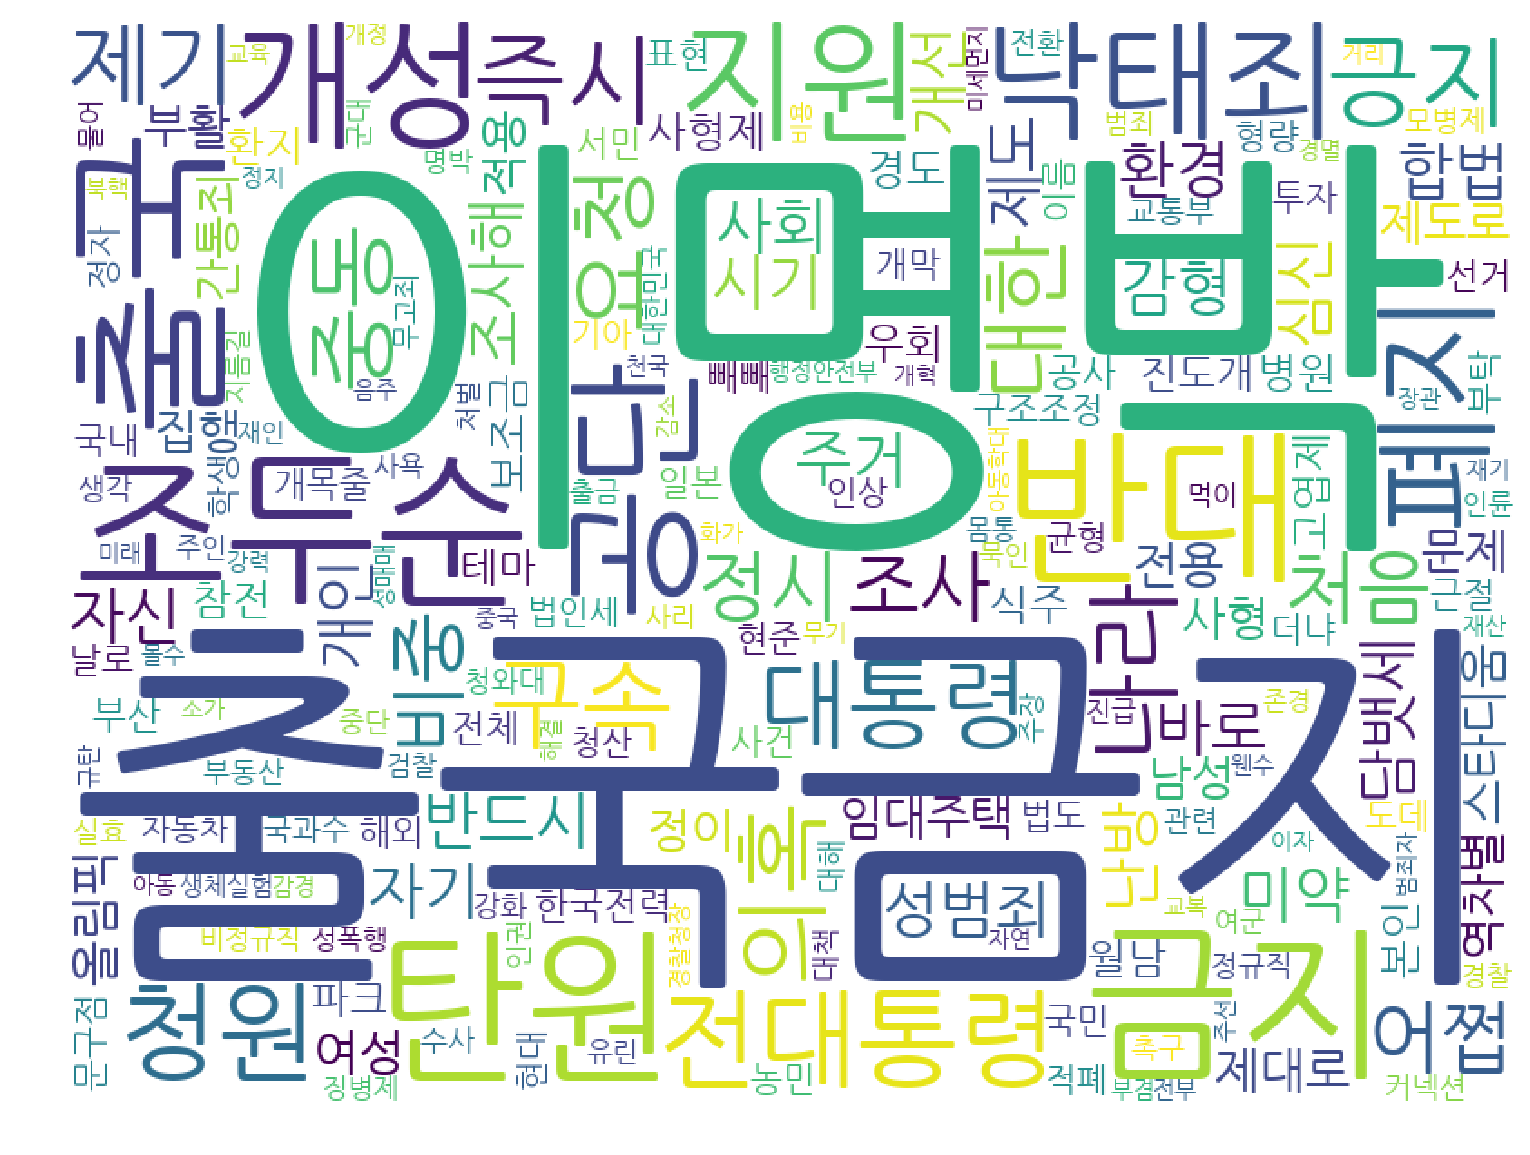

Wall time: 3.34 s


In [59]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(d)) # 명사뿐만 아니라 모든 형태 단어 출력

In [9]:
p = r'.*(대학|취업).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(22886, 8)

In [10]:
care.head()

,article_id,start,end,answered,votes,category,title,content
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...
8,29,2017-08-19,2017-09-18,0,3,미래,문재인 정부는 왜 공무원개혁엔 무관심한가?,살충제 계란 사건으로 국민들을 불안케 하고 있다.\n원인이 무엇인가? 살충제를 뿌린...
10,31,2017-08-19,2017-11-17,0,0,보건복지,<담배 제조 및 매매금지 법안>을 제정해 주시길 부탁드립니다.,안녕하세요 대통령님\n금연 관련 정책들이 강화되고 있지만 여전히 흡연자의 수는 줄어...
12,33,2017-08-19,2017-11-17,0,15,인권/성평등,납득할 수 있는 장애 재판정을 받고 싶습니다.,안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...
23,45,2017-08-19,2017-11-17,0,0,육아/교육,초등학교 교사 임용 시험 관련 해결방안,초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...


In [11]:
type(care)

pandas.core.frame.DataFrame

In [10]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 23

In [37]:
sample_title = care.loc[sample_index, 'title']
sample_title

NameError: name 'care' is not defined

In [12]:
type(sample_title)

str

In [13]:
sample_content = care['content'][sample_index]
sample_content

'초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\\n1지망 2지망 3지망으로 근무하고 싶은 지역을 선택해서 성적순으로 배정했으면 합니다.\\n그리고 해당 대학이 소재한 교육청에서 임용 시험 응시할 때 주어지는 가산점도 없애야합니다.\\n이미 수능 시험 점수에 맞춰서 해당 대학에 합격했으므로 수능 점수의 유효성은 끝이 났습니다.\\n전국 단위의 시험을 봐서 과목별 원점수,표준변환점수,백분위를 성적표에 공지해서\\n예비 교사들이 본인 성적에 맞게 근무지역을 선택하는 것입니다.\\n만약 응시자가 성적이 높다면 1지망 지역에 배정이 될테고\\n점수가 낮으면 2지망 혹은 3지망으로 밀리거나 임용 탈락이 되겠지요\\n배정 받은 지역에서 근무하면서 해당 지역이 마음에 들면 계속 근무하고\\n해당 지역이 마음에 들지 않으면 다음에 다시 시험을 봐서 근무지를 옮길 수 있도록 하는 것입니다.'

In [14]:
#pip install soynlp

In [15]:
# 토큰화
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

C:\Users\hyunho\Anaconda3\lib\site-packages\soynlp\tokenizer\_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [16]:
tokened_title = tokenizer.tokenize(sample_title) # split과 동일함
tokened_title

['초등학교', '교사', '임용', '시험', '관련', '해결방안']

In [17]:
type(tokened_title)

list

In [18]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:20]

['초등학교',
 '교사',
 '임용',
 '시험을',
 '수능',
 '시험',
 '처럼',
 '전국',
 '단위로',
 '실시하고난',
 '후에',
 '\\',
 'n',
 '1',
 '지망',
 '2',
 '지망',
 '3',
 '지망으로',
 '근무하고']

In [19]:
print(len(tokened_title))
print(len(tokened_content))

6
133


In [34]:
# 텍스트 데이터 전처리
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [21]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = care['content'].apply(preprocessing)
sentences.head()

Wall time: 389 ms


5     청원인  왕 기 운 서울 도봉구 창동 삼성아파트 101-1103호 청원취지 보건복지...
8     살충제 계란 사건으로 국민들을 불안케 하고 있다. 원인이 무엇인가? 살충제를 뿌린 ...
10    안녕하세요 대통령님 금연 관련 정책들이 강화되고 있지만 여전히 흡연자의 수는 줄어들...
12    안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...
23    초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에 1지망 2지...
Name: content, dtype: object

In [22]:
type(sentences)

pandas.core.series.Series

In [23]:
# 토큰화

In [24]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 1min 30s


5     [청원인, 왕, 기, 운, 서울, 도봉구, 창동, 삼성아파트, 101, -1103,...
8     [살충제, 계란, 사건으로, 국민들을, 불안케, 하고, 있다, ., 원인이, 무엇인...
10    [안녕하세요, 대통령님, 금연, 관련, 정책들이, 강화되고, 있지만, 여전히, 흡연...
Name: content, dtype: object

In [25]:
tokens[sample_index][:10]

['초등학교', '교사', '임용', '시험을', '수능', '시험', '처럼', '전국', '단위로', '실시하고난']

In [26]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
fontpath = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [27]:
#pip install wordcloud

In [28]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무','현재','또한','다시','지금'
               ,'이렇게','물론','그런','아닌','000원','000명','000만원'] 

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

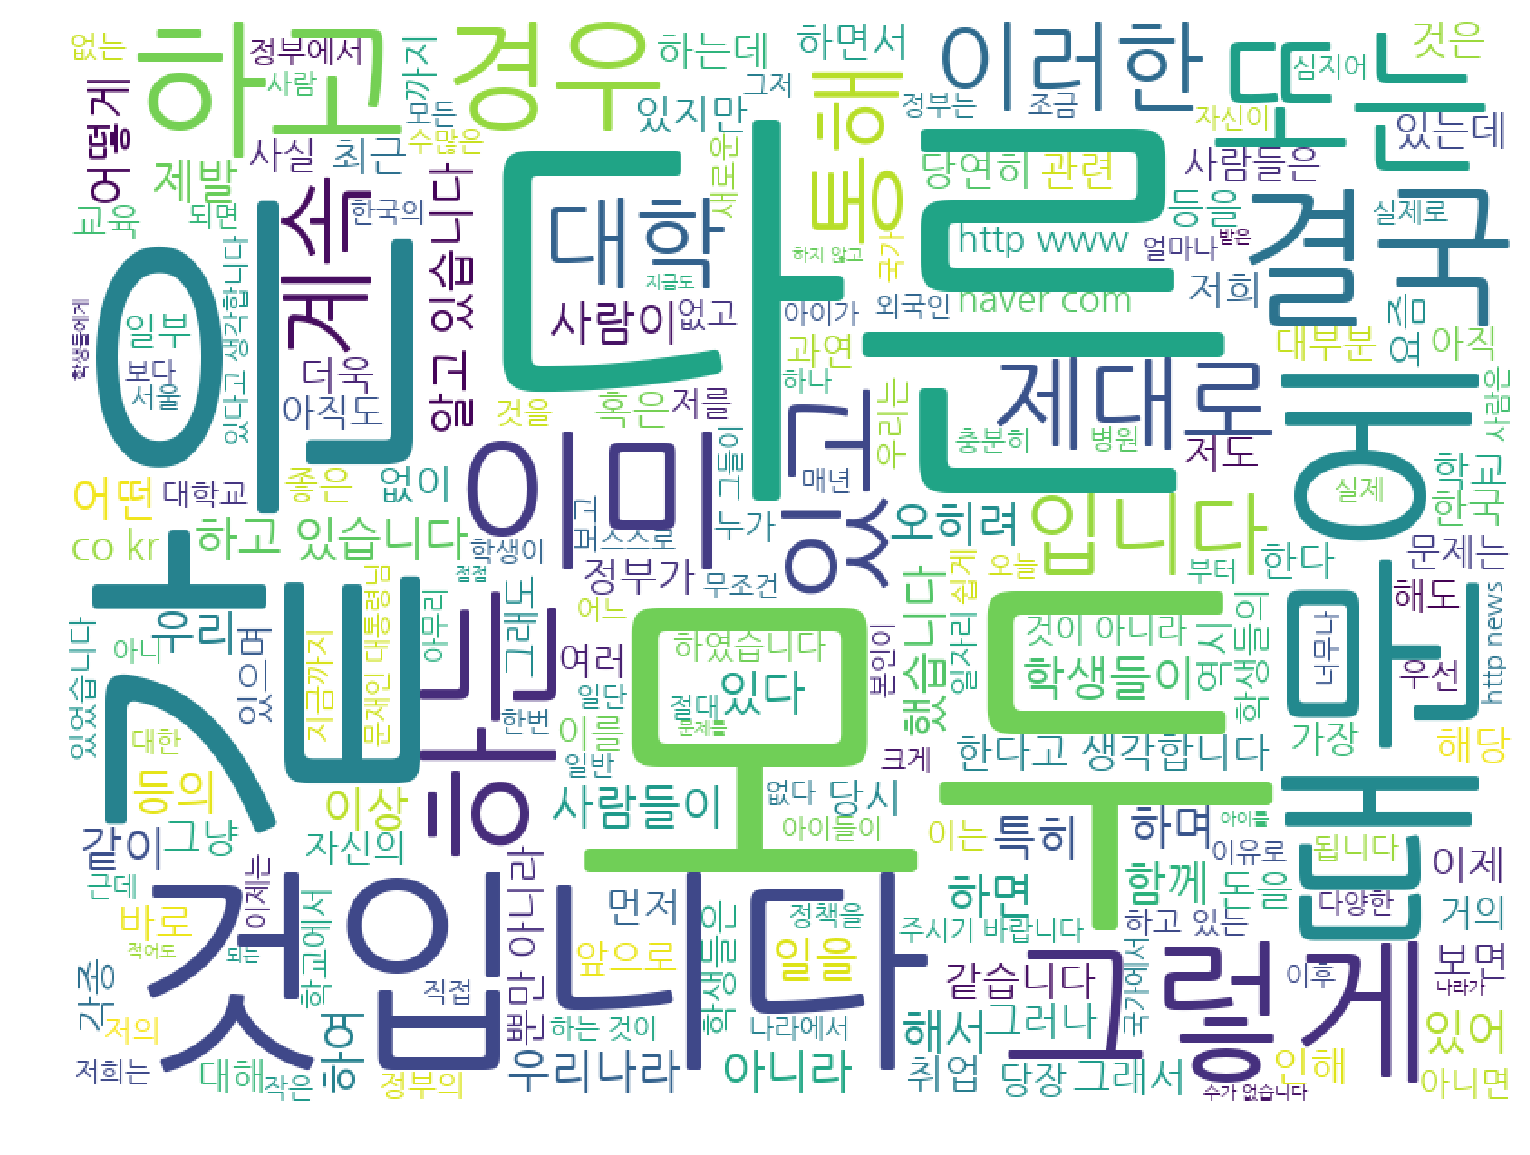

Wall time: 1min 48s


In [30]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences)) # 명사뿐만 아니라 모든 형태 단어 출력

In [31]:
from soynlp.noun import LRNounExtractor

In [32]:
noun_extractor = LRNounExtractor(verbose=True)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded


In [ ]:
noun_extractor
noun_extractor.train(sentences)

In [ ]:
nouns = noun_extractor.extract()

In [ ]:
# 추출된 명사를 찍어봅니다.

In [ ]:
displayWordCloud(' '.join(nouns))

In [ ]:
# vote수 별로 자료들이 얼마나 있는지 체크

In [12]:
import matplotlib.pyplot as plt

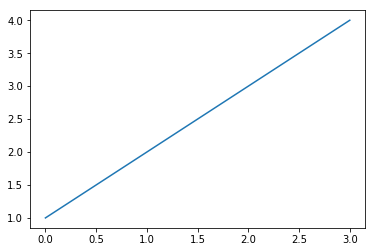

In [13]:
plt.plot([1,2,3,4])

In [14]:
x=range(0,10000)

In [15]:
y=[(petitions.loc[(petitions['votes'] == v)]).shape[0] for v in x]

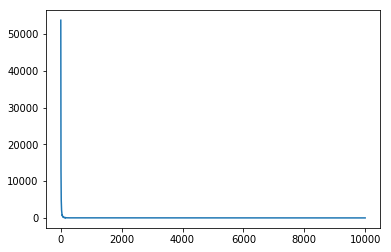

In [16]:
plt.plot(x,y)

In [26]:
x=range(0,60)

In [27]:
y=[(petitions.loc[(petitions['votes'] == v)]).shape[0] for v in x]

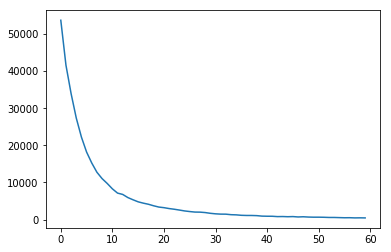

In [28]:
plt.plot(x,y)

In [29]:
type((petitions.loc[(petitions['votes'] == 0)]))

pandas.core.frame.DataFrame

In [100]:
petitions.shape

(377756, 8)

In [67]:
(petitions.loc[(petitions['votes'] == 0)]).shape

(53708, 8)

In [68]:
(petitions.loc[(petitions['votes'] == 1)]).shape

(41609, 8)

In [69]:
(petitions.loc[(petitions['votes'] == 2)]).shape

(33925, 8)

In [70]:
(petitions.loc[(petitions['votes'] == 3)]).shape

(27363, 8)

In [71]:
(petitions.loc[(petitions['votes'] == 4)]).shape

(22228, 8)

In [75]:
(petitions.loc[(petitions['votes'] == 5)]).shape

(18202, 8)

In [78]:
(petitions.loc[(petitions['votes'] < 6)]).shape[0]

197035

In [104]:
(petitions.loc[(petitions['votes'] < 21)]).shape

(303037, 8)

In [4]:
(petitions.loc[(petitions['votes'] > 100)]).shape

(17709, 8)

In [ ]:
(petitions.loc[(petitions['votes'] > 1)&(petitions['votes'] < 3)]).shape

In [52]:
(petitions.loc[(petitions['votes'] > 30)&(petitions['votes'] < 50)]).shape

(18839, 8)

In [44]:
(petitions.loc[(petitions['votes'] > 500)&(petitions['votes'] < 1000)]).shape

(1841, 8)

In [45]:
(petitions.loc[(petitions['votes'] > 1000)&(petitions['votes'] < 5000)]).shape

(2228, 8)